# Data Engineering Project Notebook
## Data Analyzers
    1. Islam Nasr.
    2. Gaser Khaled.
    3. Kariman Hossam.
    4. Marwan Karim.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler
import json

# 1) Working on the 250 Countries Dataset.

In [2]:
# Function to calculate the percentage of missing values in a given df
def calculate_missingdata_pct(df):
    missingdata = pd.DataFrame(columns=['Category', 'Percentage'])
    for col in df.columns:
        percentage = 100*df[col].isna().sum()/df.shape[0]
        missingdata = missingdata.append({'Category' : col, 'Percentage' : percentage}, ignore_index=True)
    return missingdata

In [3]:
df_countryData = pd.read_csv('./data/250 Country Data.csv')
df_countryData.head(5)

Unnamed: 0            name   region        subregion  population  \
0           0     Afghanistan     Asia    Southern Asia    27657145   
1           1   Åland Islands   Europe  Northern Europe       28875   
2           2         Albania   Europe  Southern Europe     2886026   
3           3         Algeria   Africa  Northern Africa    40400000   
4           4  American Samoa  Oceania        Polynesia       57100   

        area  gini Real Growth Rating(%)   Literacy Rate(%)  \
0   652230.0  27.8     3.1% (2013 est.).  28.1% (2000 est.)   
1     1580.0   NaN                   NaN                NaN   
2    28748.0  34.5      .7% (2013 est.).  98.7% (2011 est.)   
3  2381741.0  35.3                 3.1%.                79%   
4      199.0   NaN                   3%.    97% (1980 est.)   

        Inflation(%)                                   Unemployement(%)  
0  6.8% (2013 est.).                                   35% (2008 est.).  
1                NaN                                                NaN  
2  1.7% (2013 est.).  16.9% official rate (2013 est.). Note: These a...  
3              3.9%.                                             10.3%.  
4                NaN                                                NaN

In [4]:
df_countryData.rename(columns={'name': 'Country'}, inplace=True)
df_countryData.drop('Unnamed: 0', inplace=True, axis=1)
df_countryData.columns

Index(['Country', 'region', 'subregion', 'population', 'area', 'gini',
       'Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)',
       'Unemployement(%)'],
      dtype='object')

In [5]:
# Renaming the columns to have a more consistent naming convention.
df_countryData.rename(columns={
    'region': 'Region',
    'subregion': 'Subregion',
    'population': 'Population',
    'area': 'Area',
    'gini': 'Gini',
    'Real Growth Rating(%)': 'Real Growth Rating',
    'Literacy Rate(%)': 'Literacy Rate',
    'Inflation(%)': 'Inflation',
    'Unemployement(%)': 'Unemployment'
    }, inplace=True)
df_countryData.columns

Index(['Country', 'Region', 'Subregion', 'Population', 'Area', 'Gini',
       'Real Growth Rating', 'Literacy Rate', 'Inflation', 'Unemployment'],
      dtype='object')

#### Investigating the missing values in the country dataset.

In [6]:
calculate_missingdata_pct(df_countryData)

Category  Percentage
0             Country         0.0
1              Region         0.8
2           Subregion         1.2
3          Population         0.0
4                Area         4.0
5                Gini        38.8
6  Real Growth Rating        31.6
7       Literacy Rate        29.6
8           Inflation        32.8
9        Unemployment        32.8

In [7]:
df_countryData.isna().sum()

Country                0
Region                 2
Subregion              3
Population             0
Area                  10
Gini                  97
Real Growth Rating    79
Literacy Rate         74
Inflation             82
Unemployment          82
dtype: int64

# 2) Working on the Happiness Datasets.

In [8]:
df_happiness2015 = pd.read_csv('./data/Happiness_Dataset/2015.csv')
print(df_happiness2015.columns)
df_happiness2015.head(5)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [9]:
df_happiness2015.rename(columns={
    'Happiness Rank': 'Happiness_Rank',  
    'Happiness Score': 'Happiness_Score' , 
    'Standard Error': 'Standard_Error', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

Importing the remaining datasets and doing the same column renaming.

In [10]:
df_happiness2016 = pd.read_csv('./data/Happiness_Dataset/2016.csv')
df_happiness2016.rename(columns={
    'Happiness Rank': 'Happiness_Rank',  
    'Happiness Score': 'Happiness_Score' ,
    'Lower Confidence Interval': 'Lower_Confidence_Interval', 
    'Upper Confidence Interval': 'Upper_Confidence_Interval', 
    'Economy (GDP per Capita)': 'Economy_GDP_per_Capita',  
    'Health (Life Expectancy)': 'Health_Life_Expectancy', 
    'Trust (Government Corruption)': 'Trust_Government_Corruption',
    'Dystopia Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2017 = pd.read_csv('./data/Happiness_Dataset/2017.csv')
df_happiness2017.rename(columns={
    'Happiness.Rank': 'Happiness_Rank',  
    'Happiness.Score': 'Happiness_Score' , 
    'Whisker.low': 'Lower_Confidence_Interval', 
    'Whisker.high': 'Upper_Confidence_Interval', 
    'Economy..GDP.per.Capita.': 'Economy_GDP_per_Capita',  
    'Health..Life.Expectancy.': 'Health_Life_Expectancy', 
    'Trust..Government.Corruption.': 'Trust_Government_Corruption',
    'Dystopia.Residual': 'Dystopia_Residual'
    }, inplace=True)
df_happiness2018 = pd.read_csv('./data/Happiness_Dataset/2018.csv')
df_happiness2018.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region':'Country',  
    'Score': 'Happiness_Score' , 
    'GDP per capita': 'Economy_GDP_per_Capita',  
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices':'Freedom', 
    'Perceptions of corruption': 'Trust_Government_Corruption',
    'Social support':'Family'
    }, inplace=True)
df_happiness2019 = pd.read_csv('./data/Happiness_Dataset/2019.csv')
df_happiness2019.rename(columns={
    'Overall rank': 'Happiness_Rank',
    'Country or region':'Country',   
    'Score': 'Happiness_Score' , 
    'GDP per capita': 'Economy_GDP_per_Capita', 
    'Social support': 'Family',
    'Healthy life expectancy': 'Health_Life_Expectancy',
    'Freedom to make life choices': 'Freedom', 
    'Perceptions of corruption': 'Trust_Government_Corruption',
    }, inplace=True)

Investigating whether all years have the same list of countries or not.

In [11]:
countriesIn2015 = df_happiness2015['Country'].unique()
countriesIn2016 = df_happiness2016['Country'].unique()
countriesIn2017 = df_happiness2017['Country'].unique()
countriesIn2018 = df_happiness2018['Country'].unique()
countriesIn2019 = df_happiness2019['Country'].unique()
print('Count of countries in 2015:', len(countriesIn2015))
print('Count of countries in 2016:', len(countriesIn2016))
print('Count of countries in 2017:', len(countriesIn2017))
print('Count of countries in 2018:', len(countriesIn2018))
print('Count of countries in 2019:', len(countriesIn2019))

Count of countries in 2015: 158
Count of countries in 2016: 157
Count of countries in 2017: 155
Count of countries in 2018: 156
Count of countries in 2019: 156


Adding a Year column in order to be able to join the datasets together.

In [12]:
df_happiness2015["Year"] = 2015
df_happiness2016["Year"] = 2016
df_happiness2017["Year"] = 2017
df_happiness2018["Year"] = 2018
df_happiness2019["Year"] = 2019
df_happiness = pd.concat([df_happiness2015, df_happiness2016, df_happiness2017, df_happiness2018, df_happiness2019])
# Resorting the dataframe on Country and Year to group all country years together.
df_happiness.sort_values(by=['Country','Year'], inplace=True)
df_happiness

Country              Region  Happiness_Rank  Happiness_Score  \
152  Afghanistan       Southern Asia             153            3.575   
153  Afghanistan       Southern Asia             154            3.360   
140  Afghanistan                 NaN             141            3.794   
144  Afghanistan                 NaN             145            3.632   
153  Afghanistan                 NaN             154            3.203   
..           ...                 ...             ...              ...   
114     Zimbabwe  Sub-Saharan Africa             115            4.610   
130     Zimbabwe  Sub-Saharan Africa             131            4.193   
137     Zimbabwe                 NaN             138            3.875   
143     Zimbabwe                 NaN             144            3.692   
145     Zimbabwe                 NaN             146            3.663   

     Standard_Error  Economy_GDP_per_Capita    Family  Health_Life_Expectancy  \
152         0.03084                0.319820  0.302850                0.303350   
153             NaN                0.382270  0.110370                0.173440   
140             NaN                0.401477  0.581543                0.180747   
144             NaN                0.332000  0.537000                0.255000   
153             NaN                0.350000  0.517000                0.361000   
..              ...                     ...       ...                     ...   
114         0.04290                0.271000  1.032760                0.334750   
130             NaN                0.350410  0.714780                0.159500   
137             NaN                0.375847  1.083096                0.196764   
143             NaN                0.357000  1.094000                0.248000   
145             NaN                0.366000  1.114000                0.433000   

      Freedom  Trust_Government_Corruption  Generosity  Dystopia_Residual  \
152  0.234140                     0.097190    0.365100           1.952100   
153  0.164300                     0.071120    0.312680           2.145580   
140  0.106180                     0.061158    0.311871           2.150801   
144  0.085000                     0.036000    0.191000                NaN   
153  0.000000                     0.025000    0.158000                NaN   
..        ...                          ...         ...                ...   
114  0.258610                     0.080790    0.189870           2.441910   
130  0.254290                     0.085820    0.185030           2.442700   
137  0.336384                     0.095375    0.189143           1.597970   
143  0.406000                     0.099000    0.132000                NaN   
145  0.361000                     0.089000    0.151000                NaN   

     Year  Lower_Confidence_Interval  Upper_Confidence_Interval  
152  2015                        NaN                        NaN  
153  2016                   3.288000                   3.432000  
140  2017                   3.714338                   3.873661  
144  2018                        NaN                        NaN  
153  2019                        NaN                        NaN  
..    ...                        ...                        ...  
114  2015                        NaN                        NaN  
130  2016                   4.101000                   4.285000  
137  2017                   3.771300                   3.978700  
143  2018                        NaN                        NaN  
145  2019                        NaN                        NaN  

[782 rows x 15 columns]

### Explorting and working on the NaN values.

In [13]:
calculate_missingdata_pct(df_happiness)

Category  Percentage
0                       Country    0.000000
1                        Region   59.718670
2                Happiness_Rank    0.000000
3               Happiness_Score    0.000000
4                Standard_Error   79.795396
5        Economy_GDP_per_Capita    0.000000
6                        Family    0.000000
7        Health_Life_Expectancy    0.000000
8                       Freedom    0.000000
9   Trust_Government_Corruption    0.127877
10                   Generosity    0.000000
11            Dystopia_Residual   39.897698
12                         Year    0.000000
13    Lower_Confidence_Interval   60.102302
14    Upper_Confidence_Interval   60.102302

In [14]:
df_happiness.isna().sum()

Country                          0
Region                         467
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                 624
Economy_GDP_per_Capita           0
Family                           0
Health_Life_Expectancy           0
Freedom                          0
Trust_Government_Corruption      1
Generosity                       0
Dystopia_Residual              312
Year                             0
Lower_Confidence_Interval      470
Upper_Confidence_Interval      470
dtype: int64

#### Changing the names of some countries with inconsitent names in all years.

In [15]:
df_happiness['Country'] = df_happiness['Country'].replace({'&':'and'},regex=True)
df_happiness['Country'] = df_happiness['Country'].replace({
    'Northern Cyprus': 'North Cyprus',
    'Somaliland region': 'Somaliland Region',
    'Taiwan Province of China': 'Taiwan',
    'Hong Kong S.A.R., China': 'Hong Kong'
    })

#### Finding the common columns in all the tables of the happiness dataset.

In [16]:
columnsIn2015Happiness = np.array(df_happiness2015.columns)
columnsIn2016Happiness = np.array(df_happiness2016.columns)
columnsIn2017Happiness = np.array(df_happiness2017.columns)
columnsIn2018Happiness = np.array(df_happiness2018.columns)
columnsIn2019Happiness = np.array(df_happiness2019.columns)

columnsInAllHappinessDatasets = np.intersect1d(
    np.intersect1d(
        np.intersect1d(
            np.intersect1d(
                columnsIn2015Happiness,
                columnsIn2016Happiness
                ),
                    columnsIn2017Happiness
                    ),
                        columnsIn2018Happiness
                        ),
                            columnsIn2019Happiness
                            )
print(columnsInAllHappinessDatasets)

['Country' 'Economy_GDP_per_Capita' 'Family' 'Freedom' 'Generosity'
 'Happiness_Rank' 'Happiness_Score' 'Health_Life_Expectancy'
 'Trust_Government_Corruption' 'Year']


#### Removing the uncommon columns.

In [17]:
df_happiness = df_happiness[columnsInAllHappinessDatasets]

### Investigating whether all countries have records in all the 5 years.

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_happiness.groupby('Country').Country.count())

Country
Afghanistan                 5
Albania                     5
Algeria                     5
Angola                      4
Argentina                   5
Armenia                     5
Australia                   5
Austria                     5
Azerbaijan                  5
Bahrain                     5
Bangladesh                  5
Belarus                     5
Belgium                     5
Belize                      3
Benin                       5
Bhutan                      5
Bolivia                     5
Bosnia and Herzegovina      5
Botswana                    5
Brazil                      5
Bulgaria                    5
Burkina Faso                5
Burundi                     5
Cambodia                    5
Cameroon                    5
Canada                      5
Central African Republic    4
Chad                        5
Chile                       5
China                       5
Colombia                    5
Comoros                     3
Congo (Brazzaville)         5
Co

#### Dropping the countries that do not have records for all 5 years.

In [19]:
def countriesWithoutXRecords(df, countries, c):
    result = []
    for country in countries:
        count = df[df['Country'] == country]['Country'].count()
        if count < c:
            result.append(country)
    return result

countries = df_happiness.groupby('Country').groups.keys()

countriesWithout5Records = countriesWithoutXRecords(df_happiness, countries, 5)
print('Number of countries to drop:', len(countriesWithout5Records))
print('Number of countries that exist:', len(countries))

df_happiness = df_happiness.loc[(~df_happiness['Country'].isin(countriesWithout5Records)), :]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_happiness.groupby('Country').Country.count())
print('The new length of dataframe after dropping countries with records for less than 5 years:', len(df_happiness))

Number of countries to drop: 20
Number of countries that exist: 165
Country
Afghanistan                5
Albania                    5
Algeria                    5
Argentina                  5
Armenia                    5
Australia                  5
Austria                    5
Azerbaijan                 5
Bahrain                    5
Bangladesh                 5
Belarus                    5
Belgium                    5
Benin                      5
Bhutan                     5
Bolivia                    5
Bosnia and Herzegovina     5
Botswana                   5
Brazil                     5
Bulgaria                   5
Burkina Faso               5
Burundi                    5
Cambodia                   5
Cameroon                   5
Canada                     5
Chad                       5
Chile                      5
China                      5
Colombia                   5
Congo (Brazzaville)        5
Congo (Kinshasa)           5
Costa Rica                 5
Croatia                  

#### Checking the data now to see if there is NaN values.

In [20]:
df_happiness.isna().sum()

Country                        0
Economy_GDP_per_Capita         0
Family                         0
Freedom                        0
Generosity                     0
Happiness_Rank                 0
Happiness_Score                0
Health_Life_Expectancy         0
Trust_Government_Corruption    1
Year                           0
dtype: int64

# 3) Working on the life expectancy dataset.

In [21]:
df_lifeExpectancy = pd.read_csv('./data/Life Expectancy Data.csv')
df_lifeExpectancy.set_index(['Country', 'Year'])
df_lifeExpectancy.head(16)

Country  Year      Status  Life expectancy   Adult Mortality  \
0   Afghanistan  2015  Developing              65.0            263.0   
1   Afghanistan  2014  Developing              59.9            271.0   
2   Afghanistan  2013  Developing              59.9            268.0   
3   Afghanistan  2012  Developing              59.5            272.0   
4   Afghanistan  2011  Developing              59.2            275.0   
5   Afghanistan  2010  Developing              58.8            279.0   
6   Afghanistan  2009  Developing              58.6            281.0   
7   Afghanistan  2008  Developing              58.1            287.0   
8   Afghanistan  2007  Developing              57.5            295.0   
9   Afghanistan  2006  Developing              57.3            295.0   
10  Afghanistan  2005  Developing              57.3            291.0   
11  Afghanistan  2004  Developing              57.0            293.0   
12  Afghanistan  2003  Developing              56.7            295.0   
13  Afghanistan  2002  Developing              56.2              3.0   
14  Afghanistan  2001  Developing              55.3            316.0   
15  Afghanistan  2000  Developing              54.8            321.0   

    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0              62     0.01               71.279624         65.0      1154   
1              64     0.01               73.523582         62.0       492   
2              66     0.01               73.219243         64.0       430   
3              69     0.01               78.184215         67.0      2787   
4              71     0.01                7.097109         68.0      3013   
5              74     0.01               79.679367         66.0      1989   
6              77     0.01               56.762217         63.0      2861   
7              80     0.03               25.873925         64.0      1599   
8              82     0.02               10.910156         63.0      1141   
9              84     0.03               17.171518         64.0      1990   
10             85     0.02                1.388648         66.0      1296   
11             87     0.02               15.296066         67.0       466   
12             87     0.01               11.089053         65.0       798   
13             88     0.01               16.887351         64.0      2486   
14             88     0.01               10.574728         63.0      8762   
15             88     0.01               10.424960         62.0      6532   

    ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0   ...    6.0               8.16         65.0        0.1  584.259210   
1   ...   58.0               8.18         62.0        0.1  612.696514   
2   ...   62.0               8.13         64.0        0.1  631.744976   
3   ...   67.0               8.52         67.0        0.1  669.959000   
4   ...   68.0               7.87         68.0        0.1   63.537231   
5   ...   66.0               9.20         66.0        0.1  553.328940   
6   ...   63.0               9.42         63.0        0.1  445.893298   
7   ...   64.0               8.33         64.0        0.1  373.361116   
8   ...   63.0               6.73         63.0        0.1  369.835796   
9   ...   58.0               7.43         58.0        0.1  272.563770   
10  ...   58.0               8.70         58.0        0.1   25.294130   
11  ...    5.0               8.79          5.0        0.1  219.141353   
12  ...   41.0               8.82         41.0        0.1  198.728544   
13  ...   36.0               7.76         36.0        0.1  187.845950   
14  ...   35.0               7.80         33.0        0.1  117.496980   
15  ...   24.0               8.20         24.0        0.1  114.560000   

    Population   thinness  1-19 years   thinness 5-9 years  \
0   33736494.0                   17.2                 17.3   
1     327582.0                   17.5                 17.5   
2   31731688.0                   17.7        

In [22]:
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
# Removing the trailing spaces in the column names.
df_lifeExpectancy.rename(columns=lambda x: x.strip(), inplace=True)
df_lifeExpectancy.columns = [name.capitalize() for name in df_lifeExpectancy.columns]
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis b',
       'Measles', 'Bmi', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
# Renaming columns to have a consistent naming schema.
df_lifeExpectancy.rename(columns = {
    'Life expectancy': 'Life_Expectancy',
    'Adult mortality': 'Adult_Mortality',
    'Infant deaths': 'Infant_Deaths',
    'Percentage expenditure': 'Percentage_Expenditure',
    'Hepatitis b': 'Hepatitis_B',
    'Bmi': 'BMI',
    'Under-five deaths': 'Under-five_Deaths',
    'Total expenditure': 'Total_Expenditure',
    'Hiv/aids': 'HIV/AIDS',
    'Gdp': 'GDP',
    'Thinness  1-19 years': 'Thinness_10-19_Years',
    'Thinness 5-9 years': 'Thinness_5-9_Years',
    'Income composition of resources': 'Income_Composition_of_Resources'
}, inplace=True)
df_lifeExpectancy.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under-five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_of_Resources', 'Schooling'],
      dtype='object')

In [25]:
df_lifeExpectancy.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant_Deaths  Alcohol  Percentage_Expenditure  Hepatitis_B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total_Expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness_10-19_Years  Thinness_5-9_Years  Income_Composition_of_Resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

### Exploring the NaN values of the life expectancy dataset.

In [26]:
calculate_missingdata_pct(df_lifeExpectancy)

Category  Percentage
0                           Country    0.000000
1                              Year    0.000000
2                            Status    0.000000
3                   Life_Expectancy    0.340368
4                   Adult_Mortality    0.340368
5                     Infant_Deaths    0.000000
6                           Alcohol    6.603131
7            Percentage_Expenditure    0.000000
8                       Hepatitis_B   18.822328
9                           Measles    0.000000
10                              BMI    1.157250
11                Under-five_Deaths    0.000000
12                            Polio    0.646698
13                Total_Expenditure    7.692308
14                       Diphtheria    0.646698
15                         HIV/AIDS    0.000000
16                              GDP   15.248468
17                       Population   22.191967
18             Thinness_10-19_Years    1.157250
19               Thinness_5-9_Years    1.157250
20  Income_Composition_of_Resources    5.684139
21                        Schooling    5.547992

In [27]:
df_lifeExpectancy.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
Infant_Deaths                        0
Alcohol                            194
Percentage_Expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under-five_Deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_10-19_Years                34
Thinness_5-9_Years                  34
Income_Composition_of_Resources    167
Schooling                          163
dtype: int64

#### Removing the countries that don't have records for all 16 years. This is done in order to help us with the predicitons to follow.

In [28]:
countriesInLifeExpectancy = df_lifeExpectancy.groupby('Country').groups.keys()

countriesWithout16Records = countriesWithoutXRecords(df_lifeExpectancy, countriesInLifeExpectancy, 16)
print('Number of countries to drop:', len(countriesWithout16Records))
print('Number of countries that exist:', len(countriesInLifeExpectancy))

df_lifeExpectancy = df_lifeExpectancy.loc[(~df_lifeExpectancy['Country'].isin(countriesWithout16Records)), :]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_lifeExpectancy.groupby('Country').Country.count())
print('The new length of dataframe after dropping countries with records for less than 16 years:', len(df_lifeExpectancy))

Number of countries to drop: 10
Number of countries that exist: 193
Country
Afghanistan                                             16
Albania                                                 16
Algeria                                                 16
Angola                                                  16
Antigua and Barbuda                                     16
Argentina                                               16
Armenia                                                 16
Australia                                               16
Austria                                                 16
Azerbaijan                                              16
Bahamas                                                 16
Bahrain                                                 16
Bangladesh                                              16
Barbados                                                16
Belarus                                                 16
Belgium                                

#### We will only keep these columns: Status, Life expectancy, Adult mortality, Infant deaths, Measles, Polio, Diphtheria, HIV/AIDS, Thinness BOTH, Income composition and Schooling as they are the ones concerned with our research questions.

In [29]:
df_lifeExpectancy = df_lifeExpectancy[['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Thinness_5-9_Years', 'Thinness_10-19_Years']]
df_lifeExpectancy.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant_Deaths  Measles  Polio  Diphtheria  HIV/AIDS  Thinness_5-9_Years  \
0             62     1154    6.0        65.0       0.1                17.3   
1             64      492   58.0        62.0       0.1                17.5   
2             66      430   62.0        64.0       0.1                17.7   
3             69     2787   67.0        67.0       0.1                18.0   
4             71     3013   68.0        68.0       0.1                18.2   

   Thinness_10-19_Years  
0                  17.2  
1                  17.5  
2                  17.7  
3                  17.9  
4                  18.2

### Heatmap showing the correlations between every attribute.

Heatmap showing the correlation between every attribute.


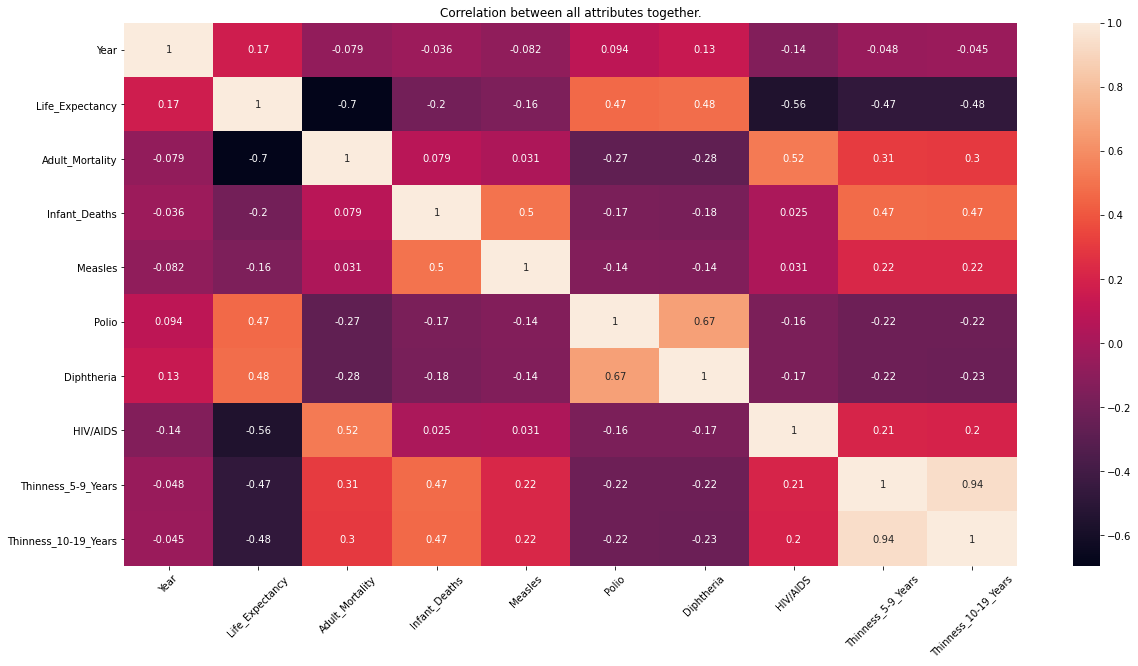

In [30]:
plt.figure(figsize=(20, 10))
print('Heatmap showing the correlation between every attribute.')
sns.heatmap(df_lifeExpectancy.corr(), annot=True)
plt.title("Correlation between all attributes together.")
plt.xticks(rotation=45)
plt.show()

### Visualising all the attributes of 3 different countries over the years.

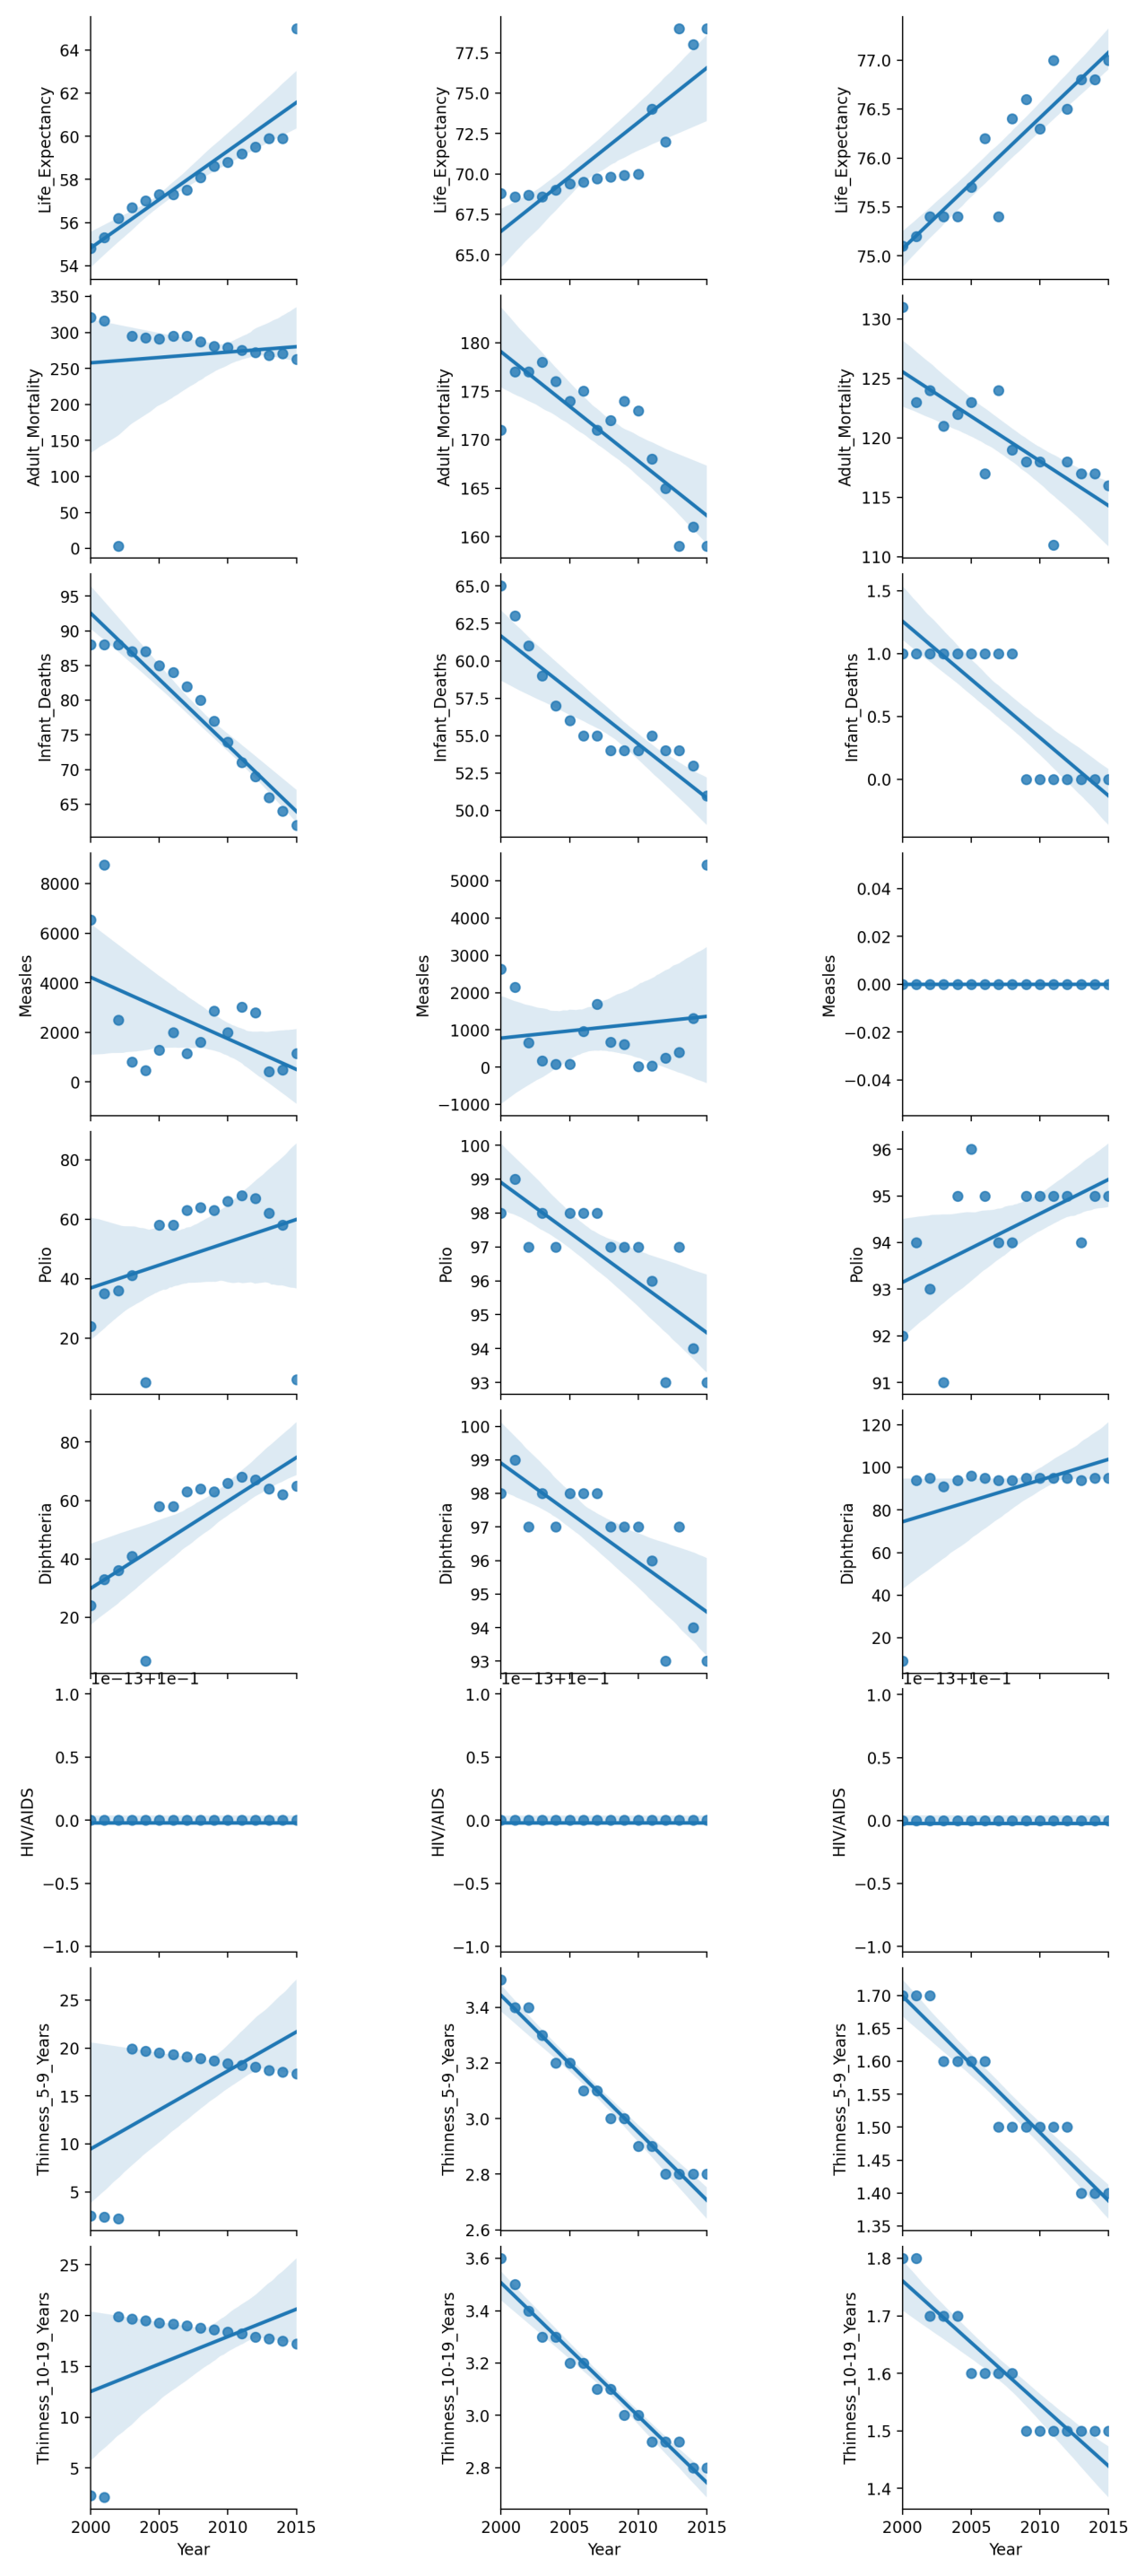

In [31]:
def pairplot(data, x_vars, y_vars):
    return sns.pairplot(data=data, x_vars=x_vars, y_vars=y_vars, kind='reg')

countryAfghanistan = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Afghanistan']
#sns.pairplot(data=countryAfghanistan, hue="Country", x_vars='Year', kind='reg', y_vars=countryAfghanistan.columns[3:])

countryEgypt = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Egypt']
#sns.pairplot(data=countryMozambique, hue="Country", x_vars='Year', kind='reg', y_vars=countryMozambique.columns[3:])

countryUruguay = df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Uruguay']
#sns.pairplot(data=countryUruguay, hue="Country", x_vars='Year', kind='reg', y_vars=countryUruguay.columns[3:])

g0 = pairplot(countryAfghanistan, 'Year', countryAfghanistan.columns[3:])
g1 = pairplot(countryEgypt, 'Year', countryEgypt.columns[3:])
g2 = pairplot(countryUruguay, 'Year', countryUruguay.columns[3:])

g0.savefig('g0.png', dpi=200)
plt.close(g0.fig)

g1.savefig('g1.png', dpi=200)
plt.close(g1.fig)

g2.savefig('g2.png', dpi=200)
plt.close(g2.fig)

f, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
plt.subplots_adjust(wspace=0.05, hspace=0)
axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))
axarr[2].imshow(mpimg.imread('g2.png'))

[ax.set_axis_off() for ax in axarr.ravel()]
plt.tight_layout()
plt.show()

## Tidying: Imputing the missing data values in the Life Expectancy dataset.

#### The missing values of Polio, Diphtheria and both Thinness are less than 1%, meaning we could impute them using the mean, based on the Status of the country.

In [32]:
# Function to calculate the mean of *col* in a dataframe based on a condition passed along in the *compareCol* and *compareTo*.
def calculateMean(df, compareCol, compareTo, col):
    return df[df[compareCol] == compareTo][col].mean()
#
#  Function to replace values with *valueToReplace* in a dataframe based on a condition on the *compareCol* using a *compareTo* value in a specific *col*.
def replaceNaN(df, compareCol, compareTo, col, valueToReplace):
    df[col] = df.apply(lambda row: valueToReplace if (np.isnan(row[col]) and row[compareCol] == compareTo) else row[col], axis=1)

In [33]:
averageOfDevelopedPolio = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Polio')
averageOfDevelopingPolio = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Polio')

averageOfDevelopedDiph = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Diphtheria')
averageOfDevelopingDiph = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Diphtheria')

averageOfDevelopedThinness = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_5-9_Years')
averageOfDevelopingThinness = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_5-9_Years')

averageOfDevelopedThinness2 = calculateMean(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_10-19_Years')
averageOfDevelopingThinness2 = calculateMean(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_10-19_Years')

print('Mean polio value of developed:', averageOfDevelopedPolio)
print('Mean polio value of developing:', averageOfDevelopingPolio)

print('Mean diphtheria value of developed:', averageOfDevelopedDiph)
print('Mean diphtheria value of developing:', averageOfDevelopingDiph)

print('Mean thinness 5-9 value of developed:', averageOfDevelopedThinness)
print('Mean thinness 5-9 value of developing:', averageOfDevelopingThinness)

print('Mean thinness 10-19 value of developed:', averageOfDevelopedThinness2)
print('Mean thinness 10-19 value of developing:', averageOfDevelopingThinness2)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Polio', averageOfDevelopedPolio)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Polio', averageOfDevelopingPolio)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Diphtheria', averageOfDevelopedDiph)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Diphtheria', averageOfDevelopingDiph)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_5-9_Years', averageOfDevelopedThinness)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_5-9_Years', averageOfDevelopingThinness)

replaceNaN(df_lifeExpectancy, 'Status', 'Developed', 'Thinness_10-19_Years', averageOfDevelopedThinness2)
replaceNaN(df_lifeExpectancy, 'Status', 'Developing', 'Thinness_10-19_Years', averageOfDevelopingThinness2)

Mean polio value of developed: 93.736328125
Mean polio value of developing: 80.15853149770547
Mean diphtheria value of developed: 93.4765625
Mean diphtheria value of developing: 79.9386733416771
Mean thinness 5-9 value of developed: 1.296679687499998
Mean thinness 5-9 value of developing: 5.651300335570467
Mean thinness 10-19 value of developed: 1.3207031250000012
Mean thinness 10-19 value of developing: 5.608724832214765


#### Functions to draw multiple box plots for given columns of a df.

In [34]:
def boxplot(df, col, ax, i):
    return sns.boxplot(x=df[col], ax=ax[i])

def drawMultipleBoxPlots(df, columns, xfigSize, yfigSize):
    f, axarr = plt.subplots(nrows=len(columns), ncols=1, figsize=(xfigSize, yfigSize))
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    i = 0
    for col in columns:
        boxplot(df, col, axarr, i)
        i += 1
    f.show()
    
def drawInterpolatedMultipleBoxPlots(df, df2, columns, xfigSize, yfigSize):
    f, axarr = plt.subplots(nrows=len(columns) * 2, ncols=1, figsize=(xfigSize, yfigSize))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    i = 0
    for col in columns:
        boxplot(df, col, axarr, i)
        i += 1
        boxplot(df2, col, axarr, i)
        i += 1
    f.show()

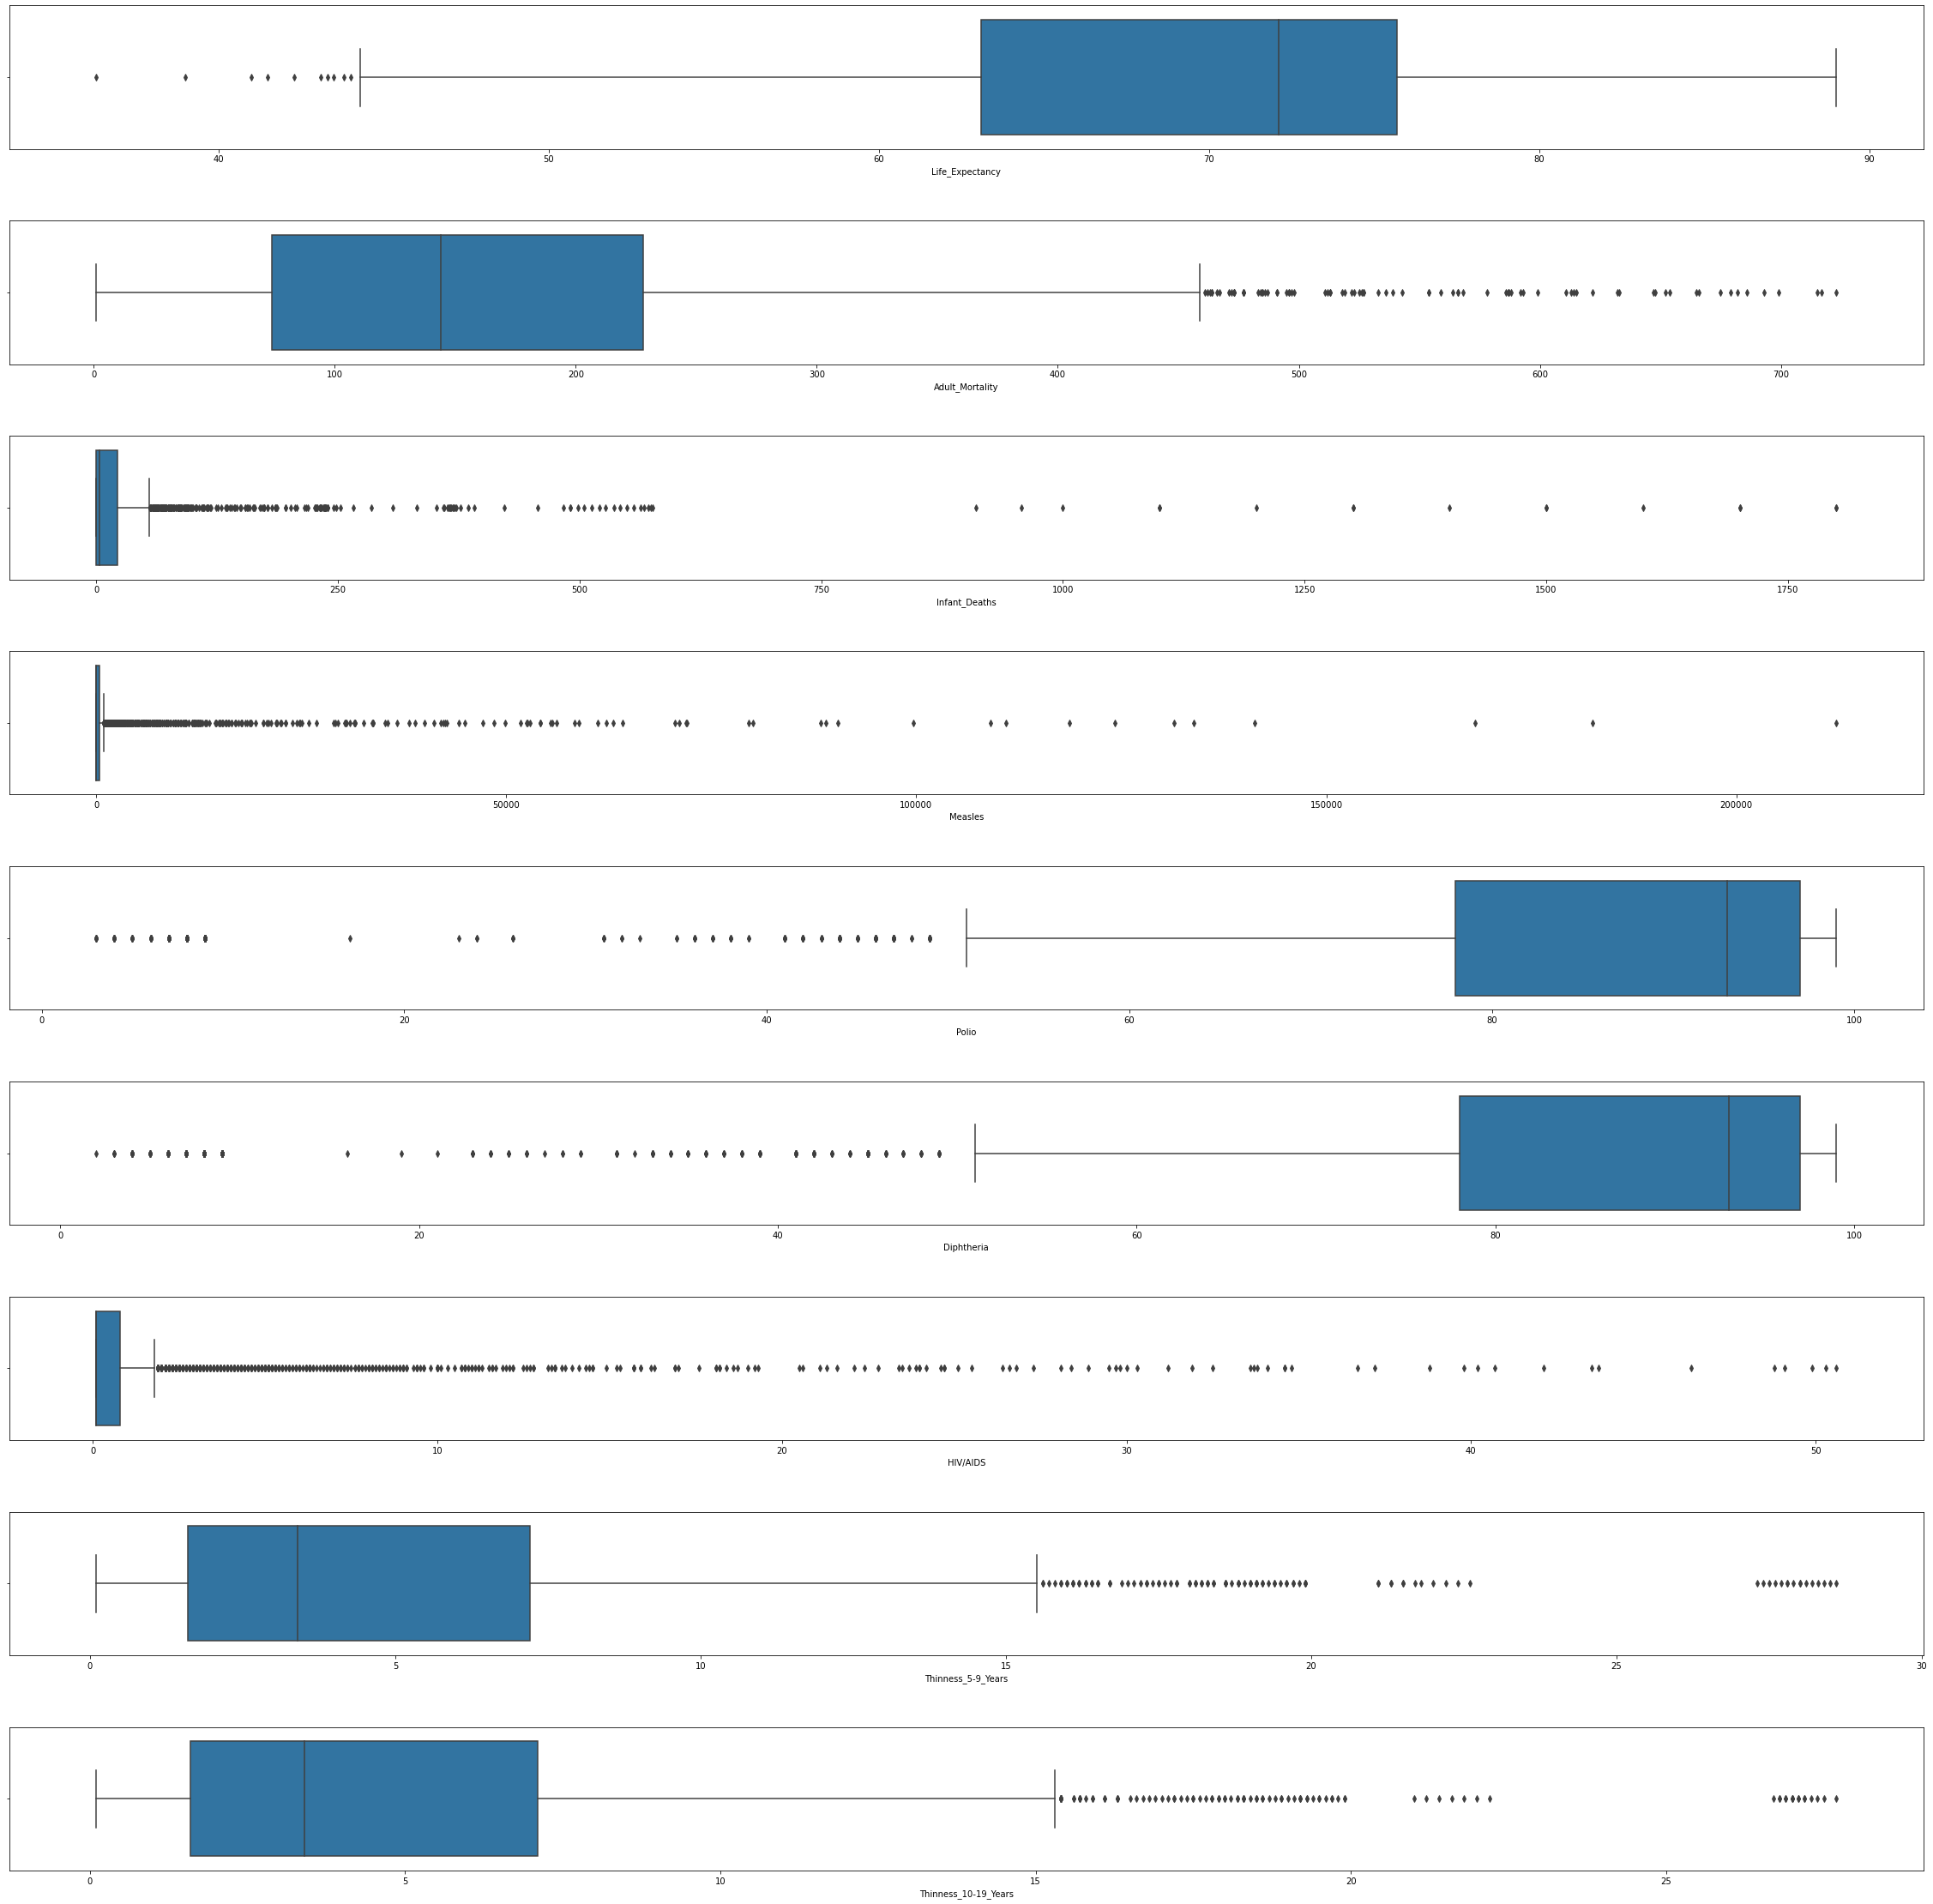

In [35]:
drawMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy.columns[3:], 40, 40)

#### Based on the above figure, we can see that there exists many values of Measles and Infant_Deaths that are more than 1000, even though the numerical values should be 1000 or below as per the column description. We will handle this by imputing any value that is higher than 1000 with the highest possible value of the box plot whisker (Q3 + IQR * 1.5).

In [36]:
Q1 = df_lifeExpectancy.quantile(0.25)
Q3 = df_lifeExpectancy.quantile(0.75)
IQR = Q3 - Q1
maxValueOfMeasles = (IQR['Measles'] * 1.5) + Q3['Measles']
maxValueOfInfantDeaths = (IQR['Infant_Deaths'] * 1.5) + Q3['Infant_Deaths']
print('The maximum value of measles cases possible per higher whisker:', maxValueOfMeasles)
print('The maximum value of infant deaths possible per higher whisker:', maxValueOfInfantDeaths)

maxValueSatisfyingConditionMeasles = df_lifeExpectancy[~(df_lifeExpectancy['Measles'] > maxValueOfMeasles)]['Measles'].max()
maxValueSatisfyingConditionInfantDeaths = df_lifeExpectancy[~(df_lifeExpectancy['Infant_Deaths'] > maxValueOfInfantDeaths)]['Infant_Deaths'].max()

print('The maximum value of measles that is less than or equal to the value of the higher whisker:', maxValueSatisfyingConditionMeasles)
print('The maximum value of infant deaths that is less than or equal to the value of the higher whisker:', maxValueSatisfyingConditionInfantDeaths)

# Function to replace all values that mostly don't make sense using these conditional values.
def replace(df, col, valueToReplace):
    df[col] = df.apply(lambda row: valueToReplace if (row[col] >= valueToReplace) else row[col], axis=1)

replace(df_lifeExpectancy, 'Measles', maxValueSatisfyingConditionMeasles)
replace(df_lifeExpectancy, 'Infant_Deaths', maxValueSatisfyingConditionInfantDeaths)

The maximum value of measles cases possible per higher whisker: 905.625
The maximum value of infant deaths possible per higher whisker: 55.0
The maximum value of measles that is less than or equal to the value of the higher whisker: 899
The maximum value of infant deaths that is less than or equal to the value of the higher whisker: 55


The new box plot representation of Measles and Infant Deaths.

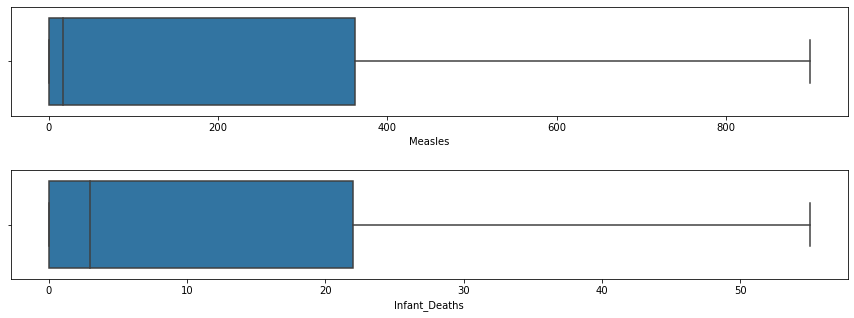

In [37]:
drawMultipleBoxPlots(df_lifeExpectancy, ['Measles', 'Infant_Deaths'], 15, 5)

In [38]:
df_lifeExpectancy.describe()

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2928.00000      2928.000000      2928.000000    2928.000000   
mean   2007.50000        69.224932       164.796448      13.681694   
std       4.61056         9.523867       124.292079      19.124887   
min    2000.00000        36.300000         1.000000       0.000000   
25%    2003.75000        63.100000        74.000000       0.000000   
50%    2007.50000        72.100000       144.000000       3.000000   
75%    2011.25000        75.700000       228.000000      22.000000   
max    2015.00000        89.000000       723.000000      55.000000   

           Measles        Polio   Diphtheria     HIV/AIDS  Thinness_5-9_Years  \
count  2928.000000  2928.000000  2928.000000  2928.000000         2928.000000   
mean    234.243169    82.532791    82.305955     1.747712            4.889837   
std     353.385411    23.341337    23.630350     5.085542            4.485605   
min       0.000000     3.000000     2.000000     0.100000            0.100000   
25%       0.000000    78.000000    78.000000     0.100000            1.600000   
50%      17.000000    93.000000    93.000000     0.100000            3.400000   
75%     362.250000    97.000000    97.000000     0.800000            7.200000   
max     899.000000    99.000000    99.000000    50.600000           28.600000   

       Thinness_10-19_Years  
count           2928.000000  
mean               4.858907  
std                4.397304  
min                0.100000  
25%                1.600000  
50%                3.400000  
75%                7.100000  
max               27.700000

## Removing the outliers from all columns using the mean.

In [39]:
# USING THE MEAN OF EVERY COUNTRY SEPARATELY
df_lifeExpectancy_copy = df_lifeExpectancy.copy()

def applyCountryReplacement(df, col, country, compareTo, valueToReplace, right):
    if right:
        df.loc[(df.Country == country) & (df[col] > compareTo), col] = valueToReplace
    else:
        df.loc[(df.Country == country) & (df[col] < compareTo), col] = valueToReplace

# Removing outliers from the left and from the right.
for country in countriesInLifeExpectancy:
    for col in df_lifeExpectancy_copy.columns[3:]:
        maxValue = (IQR[col] * 1.5) + Q3[col]
        minValue = Q1[col] - (IQR[col] * 1.5)
        mean = calculateMean(df_lifeExpectancy_copy, 'Country', country, col)
        applyCountryReplacement(df_lifeExpectancy_copy, col, country, maxValue, mean, True)
        applyCountryReplacement(df_lifeExpectancy_copy, col, country, minValue, mean, False)

#### Box plots of the new dataset.

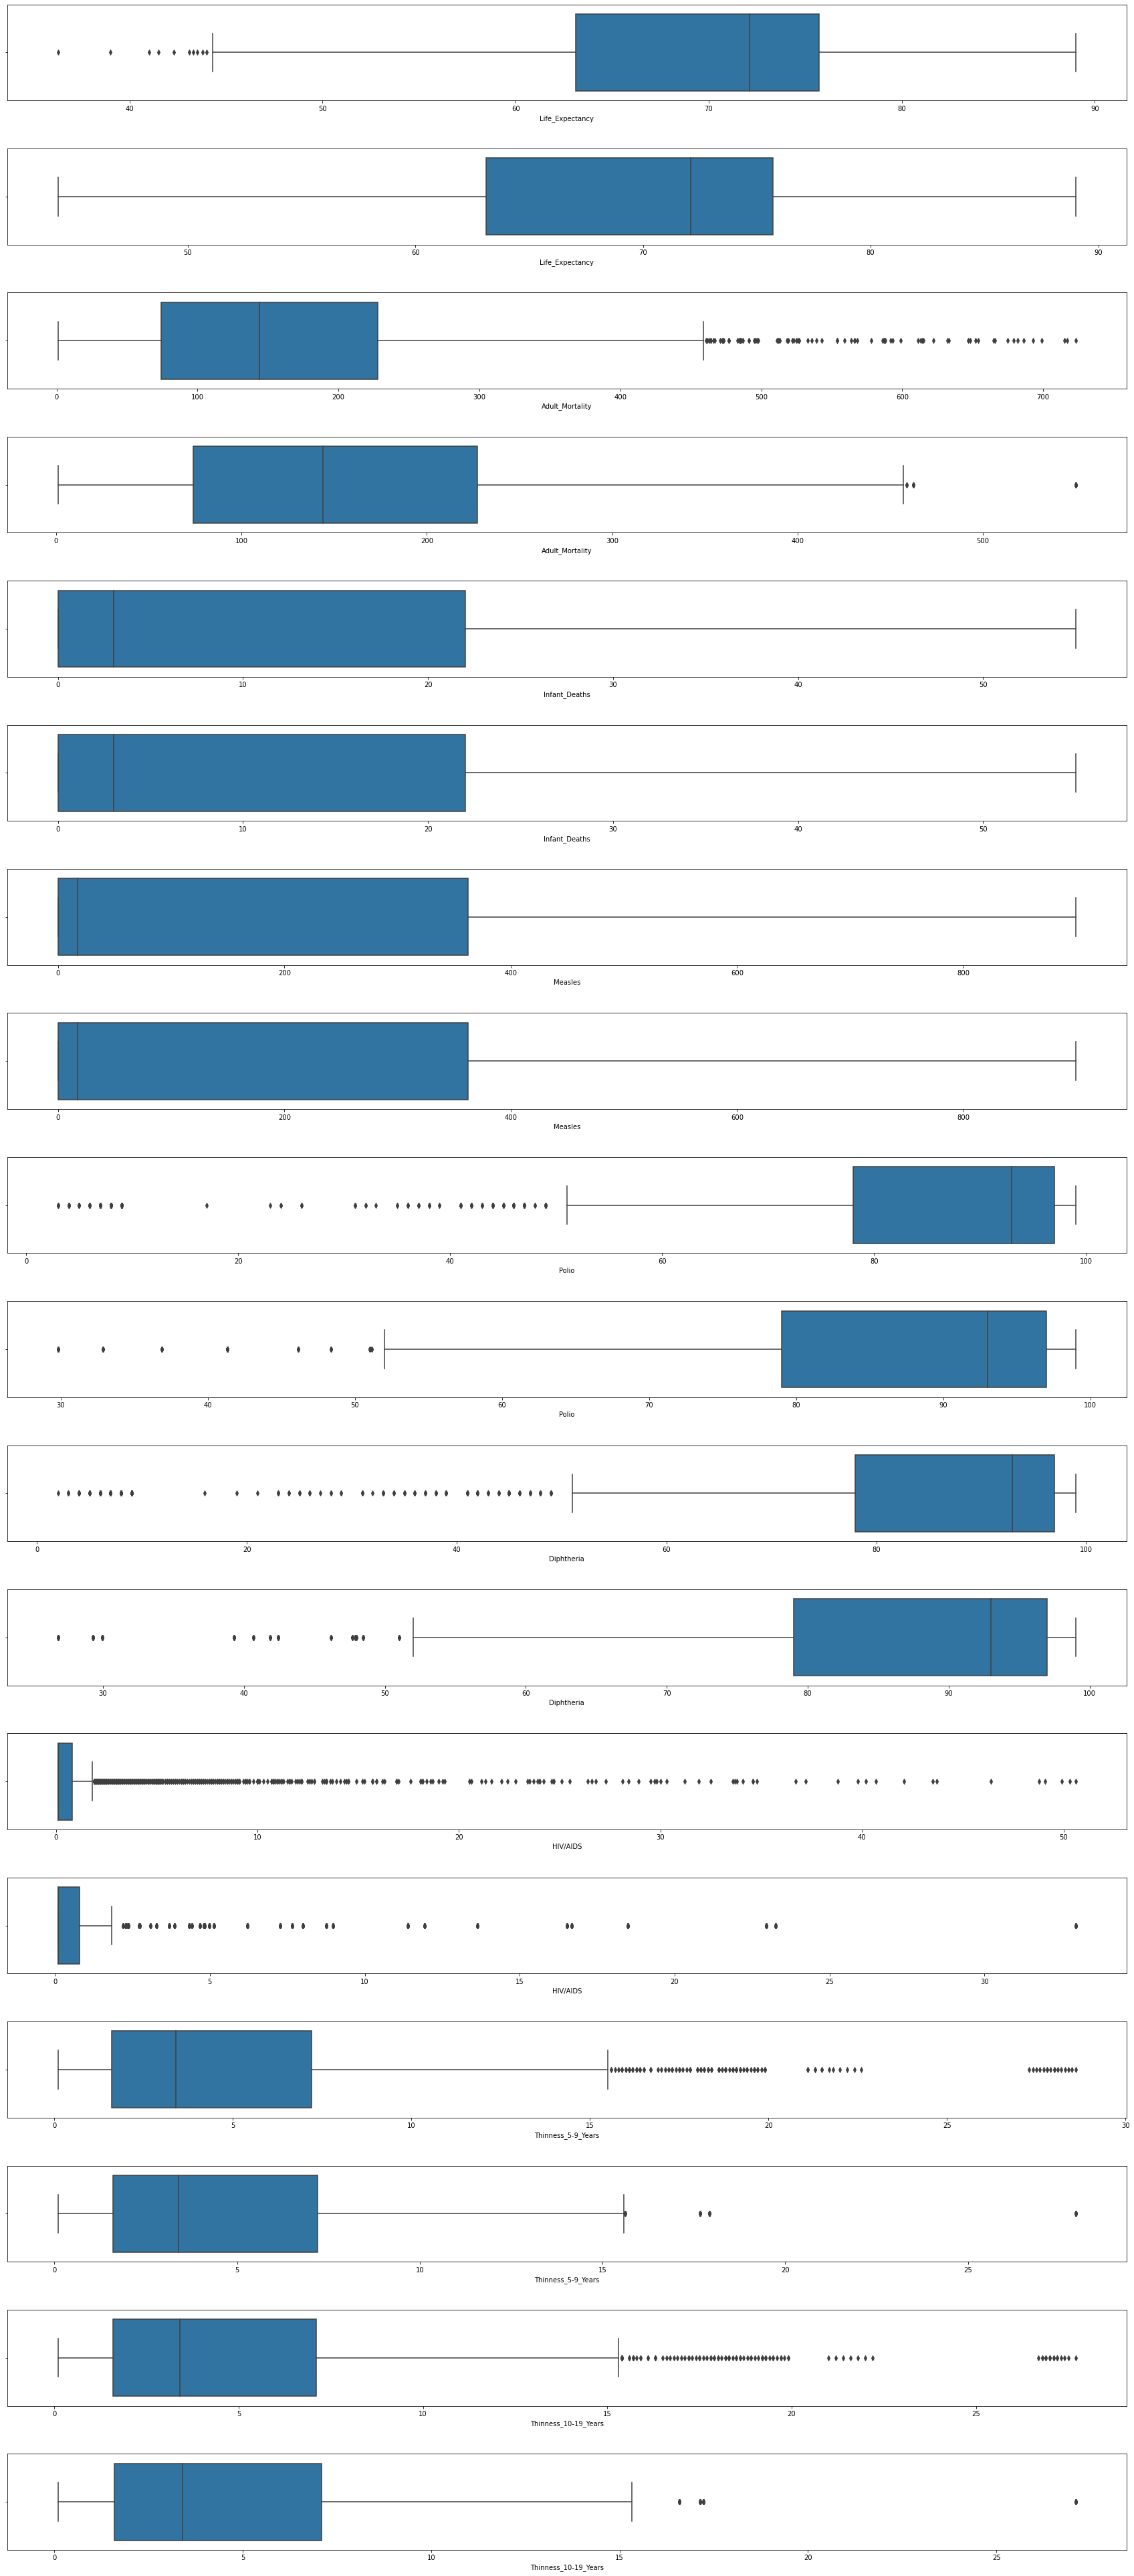

In [40]:
drawInterpolatedMultipleBoxPlots(df_lifeExpectancy, df_lifeExpectancy_copy, df_lifeExpectancy.columns[3:], 30, 70)
# Replacing the original df with the new and improved copied df
# to be used here onwards.
df_lifeExpectancy = df_lifeExpectancy_copy

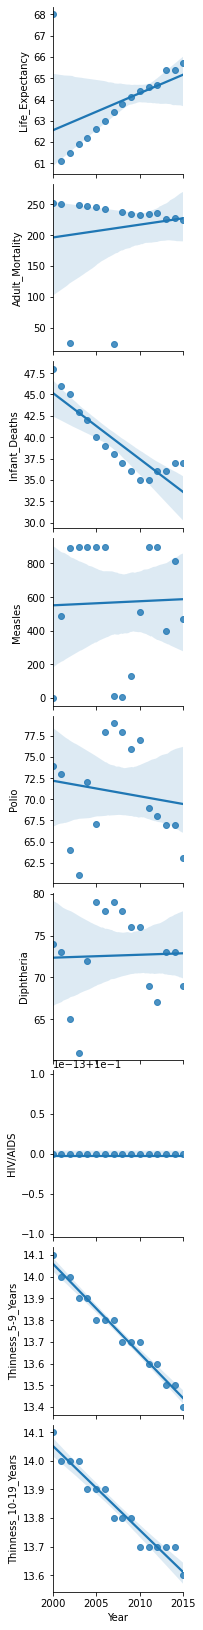

In [41]:
# plt.subplots_adjust(wspace=0, hspace=0.05)
pairplot(df_lifeExpectancy[df_lifeExpectancy['Country'] == 'Yemen'], 'Year', df_lifeExpectancy.columns[3:])

## Predicting the life expectancy values of the missing years (2016, 2017, 2018 and 2019).
### We will use linear regression to predict these values.

In [42]:
model = LinearRegression()
# The years already present which will be used for training.
years = np.flip(np.array([*df_lifeExpectancy.groupby(['Year']).groups.keys()]).reshape(-1, 1))
# A list of available countries.
allCountries = [*df_lifeExpectancy.groupby(['Country']).groups.keys()]
# The years list to predict.
years_predict = np.array([2016, 2017, 2018, 2019]).reshape(-1, 1)
dicData = {} # Dictionary to include the records for these years.
for country in allCountries:
    dicCountry = {} # Dictionary to hold the records for a single country.
    for columnName, columnData in df_lifeExpectancy.iteritems():
        if(columnName == 'Country'):
            dicCountry[columnName] = [country] * 4
            continue
        if(columnName == 'Status'):
            dicCountry[columnName] = [df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName].tolist()[0]] * 4
            continue
        if(columnName == 'Year'):
            dicCountry[columnName] = [2016, 2017, 2018, 2019]
            continue
        x_train = np.array(df_lifeExpectancy[df_lifeExpectancy['Country'] == country][columnName]).reshape(-1, 1)
        # Training the model.
        model.fit(years, x_train)
        # Using the model to predict the values for the years_predict.
        x_predict = model.predict(years_predict)
        # Putting these values into the dictionary for this column.
        dicCountry[columnName] = x_predict.flatten().tolist()
    # Putting the dictionary of all columns into the dictionary of all countries.
    dicData[country] = dicCountry

In [43]:
for country in dicData.keys():
    entry2016 = {}
    entry2017 = {}
    entry2018 = {}
    entry2019 = {}
    for col in dicData[country]:
        entry2016[col] = dicData[country][col][0]
        entry2017[col] = dicData[country][col][1]
        entry2018[col] = dicData[country][col][2]
        entry2019[col] = dicData[country][col][3]
    entries = pd.DataFrame([entry2016, entry2017, entry2018, entry2019])
    df_lifeExpectancy = df_lifeExpectancy.append(entries)

# Resorting the dataframe to have countries and years grouppings.
df_lifeExpectancy.sort_values(by=['Country','Year'], inplace=True)
df_lifeExpectancy = df_lifeExpectancy.reset_index(drop=True)
df_lifeExpectancy.head(20)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0   Afghanistan  2000  Developing        54.800000       321.000000   
1   Afghanistan  2001  Developing        55.300000       316.000000   
2   Afghanistan  2002  Developing        56.200000         3.000000   
3   Afghanistan  2003  Developing        56.700000       295.000000   
4   Afghanistan  2004  Developing        57.000000       293.000000   
5   Afghanistan  2005  Developing        57.300000       291.000000   
6   Afghanistan  2006  Developing        57.300000       295.000000   
7   Afghanistan  2007  Developing        57.500000       295.000000   
8   Afghanistan  2008  Developing        58.100000       287.000000   
9   Afghanistan  2009  Developing        58.600000       281.000000   
10  Afghanistan  2010  Developing        58.800000       279.000000   
11  Afghanistan  2011  Developing        59.200000       275.000000   
12  Afghanistan  2012  Developing        59.500000       272.000000   
13  Afghanistan  2013  Developing        59.900000       268.000000   
14  Afghanistan  2014  Developing        59.900000       271.000000   
15  Afghanistan  2015  Developing        65.000000       263.000000   
16  Afghanistan  2016  Developing        62.020000       281.775000   
17  Afghanistan  2017  Developing        62.470147       283.270588   
18  Afghanistan  2018  Developing        62.920294       284.766176   
19  Afghanistan  2019  Developing        63.370441       286.261765   

    Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  \
0            55.0  899.000000  48.375000   52.312500       0.1   
1            55.0  899.000000  48.375000   52.312500       0.1   
2            55.0  899.000000  48.375000   52.312500       0.1   
3            55.0  798.000000  48.375000   52.312500       0.1   
4            55.0  466.000000  48.375000   52.312500       0.1   
5            55.0  899.000000  58.000000   58.000000       0.1   
6            55.0  899.000000  58.000000   58.000000       0.1   
7            55.0  899.000000  63.000000   63.000000       0.1   
8            55.0  899.000000  64.000000   64.000000       0.1   
9            55.0  899.000000  63.000000   63.000000       0.1   
10           55.0  899.000000  66.000000   66.000000       0.1   
11           55.0  899.000000  68.000000   68.000000       0.1   
12           55.0  899.000000  67.000000   67.000000       0.1   
13           55.0  430.000000  62.000000   64.000000       0.1   
14           55.0  492.000000  58.000000   62.000000       0.1   
15           55.0  899.000000  48.375000   65.000000       0.1   
16           55.0  729.500000  65.278125   69.257812       0.1   
17           55.0  719.926471  66.213419   70.350184       0.1   
18           55.0  710.352941  67.148713   71.442555       0.1   
19           55.0  700.779412  68.084007   72.534926       0.1   

    Thinness_5-9_Years  Thinness_10-19_Years  
0             2.500000              2.300000  
1             2.400000              2.100000  
2             2.200000             16.581250  
3            15.581250             16.581250  
4            15.581250             16.581250  
5            15.581250             16.581250  
6            15.581250             16.581250  
7            15.581250             16.581250  
8            15.581250             16.581250  
9            15.581250             16.581250  
10           15.581250             16.581250  
11           15.581250             16.581250  
12           15.581250             16.581250  
13           15.581250             16.581250  
14           15.581250             16.581250  
15           15.581250             16.581250  
16           19.538125             19.814531  
17           20.295138             20.406406  
18           21.052151             20.998281  
19           21.809164             21.590156

# 4) Joining the 3 datasets together.

#### Query tool to get the list of countries, from a dataframe.

In [44]:
def getCountriesList(df):
    return [*df.groupby(['Country']).groups.keys()]

#### It is clear that the number of countries in all datasets is not the same. We will try to fix that a bit.

In [45]:
print('Number of countries in life expectancy dataset:', len(getCountriesList(df_lifeExpectancy)))
print('Number of countries in happiness dataset:', len(getCountriesList(df_happiness)))
print('Number of countries in 250 Countries dataset:', len(getCountriesList(df_countryData)))

Number of countries in life expectancy dataset: 183
Number of countries in happiness dataset: 145
Number of countries in 250 Countries dataset: 250


In [46]:
arr = set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy))
print('Countries in happiness dataset but not in the life expectancy dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_lifeExpectancy)).difference(getCountriesList(df_happiness))
print('Countries in life expectancy dataset but not in the happiness dataset:', '(', len(arr2), ')')
print(*arr2, sep='\n')

Countries in happiness dataset but not in the life expectancy dataset: ( 20 )
Syria
Russia
Congo (Brazzaville)
Ivory Coast
United States
Vietnam
Moldova
North Cyprus
Taiwan
Kosovo
Venezuela
South Korea
Tanzania
Congo (Kinshasa)
Palestinian Territories
Bolivia
Iran
United Kingdom
Czech Republic
Hong Kong

Countries in life expectancy dataset but not in the happiness dataset: ( 58 )
Saint Vincent and the Grenadines
Democratic Republic of the Congo
Fiji
Grenada
Côte d'Ivoire
Timor-Leste
Barbados
United Kingdom of Great Britain and Northern Ireland
Seychelles
Central African Republic
Czechia
Mozambique
Comoros
Papua New Guinea
Swaziland
Micronesia (Federated States of)
Djibouti
Republic of Moldova
Viet Nam
Republic of Korea
Saint Lucia
Tonga
Somalia
Maldives
Brunei Darussalam
The former Yugoslav republic of Macedonia
Vanuatu
Congo
Angola
Cabo Verde
Bolivia (Plurinational State of)
Guinea-Bissau
Russian Federation
Kiribati
Belize
Iran (Islamic Republic of)
Antigua and Barbuda
Cuba
United St

#### Using the countries difference found above, we renamed the counrtries in the life expectancy dataset to have a consistent naming schema.

In [47]:
df_lifeExpectancy['Country'] = df_lifeExpectancy['Country'].replace({
    'Iran (Islamic Republic of)':'Iran', 
    'Czechia':'Czech Republic',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Congo':'Congo (Brazzaville)',
    'United Republic of Tanzania':'Tanzania',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Republic of Korea':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos',
    'Republic of Moldova':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'The former Yugoslav republic of Macedonia':'Macedonia',
    'Czechia':'Czech Republic'
    })

#### Rechecking for differences: we find now that there is an improvement.

In [48]:
arr = set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy))
print('Countries in happiness dataset but not in the life expectancy dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_lifeExpectancy)).difference(getCountriesList(df_happiness))
print('Countries in life expectancy dataset but not in the happiness dataset:', '(', len(arr2), ')')
print(*arr2, sep='\n')

Countries in happiness dataset but not in the life expectancy dataset: ( 5 )
Taiwan
Palestinian Territories
North Cyprus
Kosovo
Hong Kong

Countries in life expectancy dataset but not in the happiness dataset: ( 43 )
Kiribati
Belize
Antigua and Barbuda
Saint Vincent and the Grenadines
Cuba
Sudan
Fiji
Grenada
Bahamas
Oman
Solomon Islands
Eritrea
Timor-Leste
Barbados
Lesotho
Namibia
Laos
Gambia
Seychelles
Central African Republic
Democratic People's Republic of Korea
Mozambique
Comoros
Papua New Guinea
Swaziland
Micronesia (Federated States of)
Equatorial Guinea
Sao Tome and Principe
Samoa
Djibouti
Saint Lucia
Tonga
Somalia
South Sudan
Maldives
Brunei Darussalam
Vanuatu
Macedonia
Angola
Cabo Verde
Guinea-Bissau
Guyana
Suriname


In [49]:
countriesListJoined_lifeExpectancy_happiness = set(getCountriesList(df_lifeExpectancy)) & set(getCountriesList(df_happiness))
print('Number of countries after joining happiness dataset with life expectancy dataset:', len(countriesListJoined_lifeExpectancy_happiness))
print('Country list after joining:', *countriesListJoined_lifeExpectancy_happiness, sep='\n')

Number of countries after joining happiness dataset with life expectancy dataset: 140
Country list after joining:
Tunisia
Estonia
Sweden
Albania
Colombia
Norway
Madagascar
Syria
Malta
Poland
Ireland
Sri Lanka
Jordan
Ethiopia
Russia
Lithuania
Egypt
Malaysia
Italy
Congo (Brazzaville)
Israel
Canada
Australia
Bulgaria
Morocco
South Africa
Georgia
France
New Zealand
Dominican Republic
Kyrgyzstan
Mexico
Niger
Ivory Coast
Malawi
Nicaragua
United States
Nigeria
Thailand
Afghanistan
Luxembourg
Zambia
Japan
Azerbaijan
Vietnam
Singapore
Moldova
Ghana
Zimbabwe
Mongolia
Ecuador
El Salvador
Rwanda
Iceland
Lebanon
Algeria
Germany
Trinidad and Tobago
Croatia
Haiti
Greece
Qatar
Chile
Myanmar
Philippines
Cameroon
Slovenia
Guinea
Peru
Uzbekistan
Venezuela
Brazil
Bhutan
Kuwait
Armenia
South Korea
Finland
Belarus
Cambodia
Burundi
Argentina
Spain
Liberia
Montenegro
Kenya
Uganda
Honduras
Mauritius
Pakistan
Sierra Leone
Gabon
Iraq
Uruguay
China
Austria
Denmark
Bahrain
Bosnia and Herzegovina
India
Guatemala
Sa

In [50]:
print('Countries to be dropped from the happiness dataset:', set(getCountriesList(df_happiness)).difference(getCountriesList(df_lifeExpectancy)))

Countries to be dropped from the happiness dataset: {'Taiwan', 'Palestinian Territories', 'North Cyprus', 'Kosovo', 'Hong Kong'}


### Now to join the 250 country data set with the filtered country list after joining life expectancy countries with happiness.

In [51]:
arr = set(countriesListJoined_lifeExpectancy_happiness).difference(getCountriesList(df_countryData))
print('In the cleaned list of countries and not in the 250 countries dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_countryData)).difference(countriesListJoined_lifeExpectancy_happiness)
print('In the 250 countries dataset and not in the cleaned list of countries:', '(', len(arr2), ')')
print(*arr2, sep='\n')

In the cleaned list of countries and not in the 250 countries dataset: ( 14 )
Syria
Russia
Congo (Brazzaville)
Ivory Coast
United States
Vietnam
Moldova
Venezuela
South Korea
Tanzania
Congo (Kinshasa)
Bolivia
Iran
United Kingdom

In the 250 countries dataset and not in the cleaned list of countries: ( 124 )
Guadeloupe
Antarctica
Guam
Turks and Caicos Islands
Western Sahara
Saint Vincent and the Grenadines
Virgin Islands (U.S.)
Greenland
Fiji
Grenada
Bouvet Island
Martinique
Timor-Leste
Côte d'Ivoire
Macedonia (the former Yugoslav Republic of)
Barbados
Marshall Islands
Andorra
Christmas Island
Cook Islands
Cocos (Keeling) Islands
French Polynesia
Isle of Man
United Kingdom of Great Britain and Northern Ireland
Seychelles
Central African Republic
Palestine, State of
Tuvalu
Faroe Islands
Jersey
Mozambique
Pitcairn
Comoros
Papua New Guinea
Swaziland
Micronesia (Federated States of)
Niue
Moldova (Republic of)
Saint Helena, Ascension and Tristan da Cunha
Aruba
Congo (Democratic Republic of t

In [52]:
df_countryData['Country'] = df_countryData['Country'].replace({
    'Iran (Islamic Republic of)':'Iran',
    'Tanzania, United Republic of':'Tanzania',
    'Congo':'Congo (Brazzaville)',
    'Congo (Democratic Republic of the)':'Congo (Kinshasa)',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Korea (Republic of)':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos', 
    'Moldova (Republic of)':'Moldova',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Macedonia (the former Yugoslav Republic of)':'Macedonia'
    })

In [53]:
arr = set(countriesListJoined_lifeExpectancy_happiness).difference(getCountriesList(df_countryData))
print('In the cleaned list of countries and not in the 250 countries dataset:', '(', len(arr), ')')
print(*arr, sep='\n')
print()
arr2 = set(getCountriesList(df_countryData)).difference(countriesListJoined_lifeExpectancy_happiness)
print('In the 250 countries dataset and not in the cleaned list of countries:', '(', len(arr2), ')')
print(*arr2, sep='\n')

In the cleaned list of countries and not in the 250 countries dataset: ( 0 )


In the 250 countries dataset and not in the cleaned list of countries: ( 110 )
Guadeloupe
Antarctica
Guam
Turks and Caicos Islands
Western Sahara
Saint Vincent and the Grenadines
Virgin Islands (U.S.)
Greenland
Fiji
Grenada
Bouvet Island
Martinique
Timor-Leste
Barbados
Marshall Islands
Andorra
Christmas Island
Cook Islands
Cocos (Keeling) Islands
French Polynesia
Isle of Man
Laos
Seychelles
Central African Republic
Palestine, State of
Tuvalu
Faroe Islands
Jersey
Mozambique
Pitcairn
Comoros
Papua New Guinea
Swaziland
Micronesia (Federated States of)
Niue
Saint Helena, Ascension and Tristan da Cunha
Aruba
Palau
Tokelau
Guernsey
Montserrat
Djibouti
Cayman Islands
Saint Lucia
Tonga
Somalia
Puerto Rico
South Georgia and the South Sandwich Islands
Bonaire, Sint Eustatius and Saba
Bermuda
Maldives
Brunei Darussalam
Korea (Democratic People's Republic of)
British Indian Ocean Territory
Macao
New Caledonia
French Gui

In [54]:
countriesList_joinedThree = set(getCountriesList(df_countryData)) & set(countriesListJoined_lifeExpectancy_happiness)
print('Count of countries after joining all three datasets:', len(countriesList_joinedThree), *sorted(countriesList_joinedThree), sep='\n')

Count of countries after joining all three datasets:
140
Afghanistan
Albania
Algeria
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahrain
Bangladesh
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cyprus
Czech Republic
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Finland
France
Gabon
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Mali
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
Norway
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saudi Arabia
Senegal
Ser

#### Dropping the countries that are not in the joined list of countries from all data frames.

In [55]:
# Dropping the years before 2015 as they will not be used in the analysis.
# They are also not present in the happiness dataset, meaning they
# will be dropped anyway upon joining.
df_lifeExpectancyComplete = df_lifeExpectancy # --> Saving the complete, original DF with 20 records for each country for later usage
df_lifeExpectancy = df_lifeExpectancy.loc[df_lifeExpectancy['Year'] >= 2015, :]

df_countryData = df_countryData.loc[(df_countryData['Country'].isin(countriesList_joinedThree)), :]
df_happiness = df_happiness.loc[(df_happiness['Country'].isin(countriesList_joinedThree)), :]
df_lifeExpectancy = df_lifeExpectancy.loc[(df_lifeExpectancy['Country'].isin(countriesList_joinedThree)), :]

In [56]:
print('Countries in country data:', len(getCountriesList(df_countryData)))
print('Countries in happiness:', len(getCountriesList(df_happiness)))
print('Coutnries in life expectancy:', len(getCountriesList(df_lifeExpectancy)))

Countries in country data: 140
Countries in happiness: 140
Coutnries in life expectancy: 140


In [57]:
df_lifeExpectancy['Year'].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

### Merging Life expectancy dataset with the Happiness dataset.

In [58]:
print(len(df_lifeExpectancy), len(df_happiness))
df_merged_expectancyHappiness = pd.merge(df_lifeExpectancy, df_happiness, on=['Country', 'Year'], how='inner')
df_merged_expectancyHappiness

700 700


Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0    Afghanistan  2015  Developing        65.000000       263.000000   
1    Afghanistan  2016  Developing        62.020000       281.775000   
2    Afghanistan  2017  Developing        62.470147       283.270588   
3    Afghanistan  2018  Developing        62.920294       284.766176   
4    Afghanistan  2019  Developing        63.370441       286.261765   
..           ...   ...         ...              ...              ...   
695     Zimbabwe  2015  Developing        67.000000       336.000000   
696     Zimbabwe  2016  Developing        61.467500       389.756250   
697     Zimbabwe  2017  Developing        62.759265       392.643934   
698     Zimbabwe  2018  Developing        64.051029       395.531618   
699     Zimbabwe  2019  Developing        65.342794       398.419301   

     Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  \
0        55.000000  899.000000  48.375000   65.000000    0.1000   
1        55.000000  729.500000  65.278125   69.257812    0.1000   
2        55.000000  719.926471  66.213419   70.350184    0.1000   
3        55.000000  710.352941  67.148713   71.442555    0.1000   
4        55.000000  700.779412  68.084007   72.534926    0.1000   
..             ...         ...        ...         ...       ...   
695      22.000000    0.000000  88.000000   87.000000   23.2625   
696      26.100000  -18.725000  93.068750   93.779688   23.2625   
697      26.045588  -59.810294  94.616360   95.465625   23.2625   
698      25.991176 -100.895588  96.163971   97.151563   23.2625   
699      25.936765 -141.980882  97.711581   98.837500   23.2625   

     Thinness_5-9_Years  Thinness_10-19_Years  Economy_GDP_per_Capita  \
0             15.581250             16.581250                0.319820   
1             19.538125             19.814531                0.382270   
2             20.295138             20.406406                0.401477   
3             21.052151             20.998281                0.332000   
4             21.809164             21.590156                0.350000   
..                  ...                   ...                     ...   
695            5.500000              5.600000                0.271000   
696            6.410000              6.622500                0.350410   
697            6.342059              6.576618                0.375847   
698            6.274118              6.530735                0.357000   
699            6.206176              6.484853                0.366000   

       Family   Freedom  Generosity  Happiness_Rank  Happiness_Score  \
0    0.302850  0.234140    0.365100             153            3.575   
1    0.110370  0.164300    0.312680             154            3.360   
2    0.581543  0.106180    0.311871             141            3.794   
3    0.537000  0.085000    0.191000             145            3.632   
4    0.517000  0.000000    0.158000             154            3.203   
..        ...       ...         ...             ...              ...   
695  1.032760  0.258610    0.189870             115            4.610   
696  0.714780  0.254290    0.185030             131            4.193   
697  1.083096  0.336384    0.189143             138            3.875   
698  1.094000  0.406000    0.132000             144            3.692   
699  1.114000  0.361000    0.151000             146            3.663   

     Health_Life_Expectancy  Trust_Government_Corruption  
0                  0.303350                     0.097190  
1                  0.173440                     0.071120  
2                  0.180747                     0.061158  
3                  0.255000                     0.036000  
4                  0.361000                     0.025000  
..                      ...                          ...  
695                0.334750                     0.080790  
696                0.159500                     0.085820  
697                0.196764                     0.095375  
698    

### Merging country data with the merged dataset of happiness and life expectancy.

In [59]:
df_mergedThree = pd.merge(df_merged_expectancyHappiness, df_countryData, on='Country', how='inner')
df_mergedThree.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Measles', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'Thinness_5-9_Years', 'Thinness_10-19_Years', 'Economy_GDP_per_Capita',
       'Family', 'Freedom', 'Generosity', 'Happiness_Rank', 'Happiness_Score',
       'Health_Life_Expectancy', 'Trust_Government_Corruption', 'Region',
       'Subregion', 'Population', 'Area', 'Gini', 'Real Growth Rating',
       'Literacy Rate', 'Inflation', 'Unemployment'],
      dtype='object')

#### Explorting the missing values/data in the clean merged dataset.

In [60]:
calculate_missingdata_pct(df_mergedThree)

Category  Percentage
0                       Country    0.000000
1                          Year    0.000000
2                        Status    0.000000
3               Life_Expectancy    0.000000
4               Adult_Mortality    0.000000
5                 Infant_Deaths    0.000000
6                       Measles    0.000000
7                         Polio    0.000000
8                    Diphtheria    0.000000
9                      HIV/AIDS    0.000000
10           Thinness_5-9_Years    0.000000
11         Thinness_10-19_Years    0.000000
12       Economy_GDP_per_Capita    0.000000
13                       Family    0.000000
14                      Freedom    0.000000
15                   Generosity    0.000000
16               Happiness_Rank    0.000000
17              Happiness_Score    0.000000
18       Health_Life_Expectancy    0.000000
19  Trust_Government_Corruption    0.142857
20                       Region    0.000000
21                    Subregion    0.000000
22                   Population    0.000000
23                         Area    0.000000
24                         Gini    9.285714
25           Real Growth Rating   20.000000
26                Literacy Rate   15.714286
27                    Inflation   20.714286
28                 Unemployment   20.714286

# 5) Research Questions

## Question 1: What is the relationship between life expectency and happiness in each region?

In [61]:
regions = [*df_mergedThree.groupby('Region').groups.keys()]
lifeExpectancyMeanByRegion = []
happinessMeanByRegion = []
regionArea=[]
for region in regions:
    meanLE = df_mergedThree[df_mergedThree['Region'] == region]['Life_Expectancy'].mean()
    meanH = df_mergedThree[df_mergedThree['Region'] == region]['Happiness_Score'].mean()
    sumArea = df_mergedThree[df_mergedThree['Region'] == region]['Area'].sum()
    sumArea = sumArea/5
    lifeExpectancyMeanByRegion.append(meanLE)
    happinessMeanByRegion.append(meanH)
    regionArea.append(sumArea)
# print(lifeExpectancyMeanByRegion, happinessMeanByRegion)
df_q1 = pd.DataFrame({'Region': regions, 'Life_Expectancy': lifeExpectancyMeanByRegion, 'Happiness_Score': happinessMeanByRegion, 'Area':regionArea})

As shown in the below figures, there is a direct replationship between happiness and life expectancy. As life expectency increases, the mean happiness score of the region increases. This is visible in [Fig_1A](#1a) where we plotted the life expectency on the x-axis and the happiness score on the y-axis, the area being the size of each circle. 
The graph [here](#1a) also shows that as the size of the region decreases, the happiness score and the life expectency of people in that region increases, this could be another relationship. We decided to inspect this relation in figures [Fig_1B](#1b) and [Fig_1C](#1c), but this hypothesis failed and the visualisations show no visibile relation. This is plotted in [Fig_1D](#1d) with the region on the x-axis and the life expectency on the y-axis showing the happiness score as the size of the circle.

<a id="1a"></a>
### Fig_1A

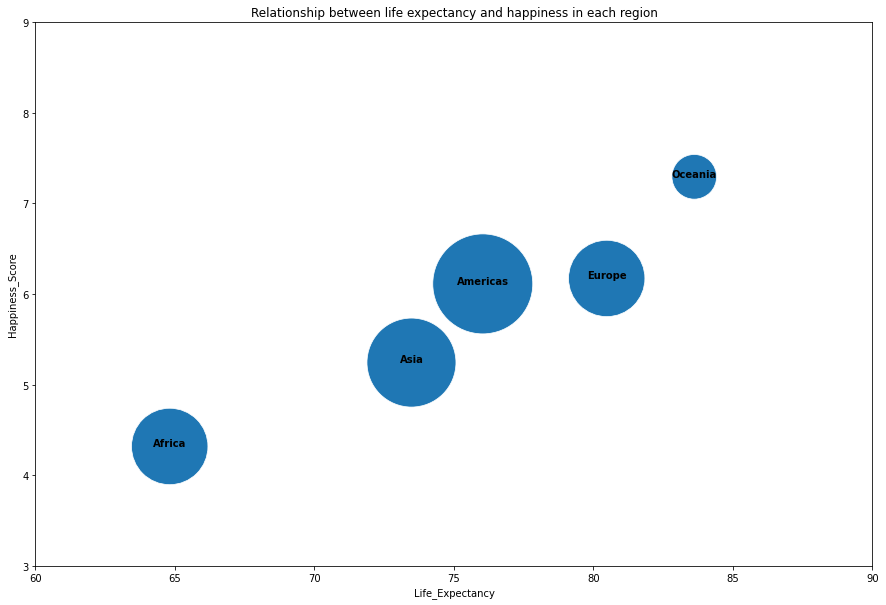

In [62]:
plt.figure(figsize = (15,10))
plt.title("Relationship between life expectancy and happiness in each region")
ax = sns.scatterplot(df_q1['Life_Expectancy'], df_q1['Happiness_Score'],size = df_q1['Area'], sizes=(2000,10000), legend=False)
ax.set_xlim(60,90)
ax.set_ylim(3, 9)

#For each point, we add a text inside the bubble
for line in range(0, df_q1.shape[0]):
     ax.text(df_q1['Life_Expectancy'].iloc[line], df_q1['Happiness_Score'].iloc[line], df_q1['Region'].iloc[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

<a id="1b"></a>
### Fig_1B

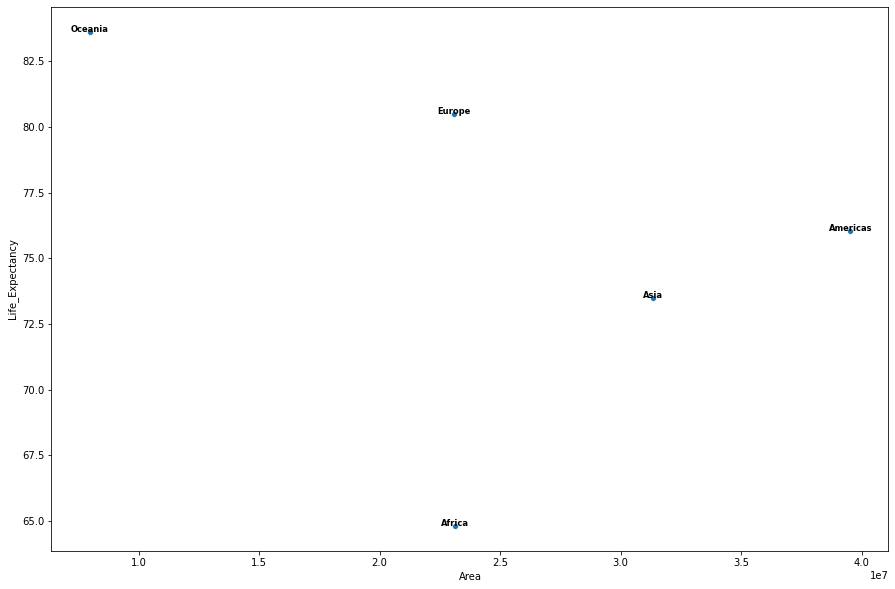

In [63]:
plt.figure(figsize = (15,10))

ax = sns.scatterplot( df_q1['Area'],df_q1['Life_Expectancy'], legend=False)
# ax.set_xlim(60,90)
# ax.set_ylim(3, 9)

#For each point, we add a text inside the bubble
for line in range(0, df_q1.shape[0]):
     ax.text( df_q1['Area'].iloc[line],df_q1['Life_Expectancy'].iloc[line], df_q1['Region'].iloc[line], horizontalalignment='center', size='small', color='black', weight='semibold')

<a id="1c"></a>
### Fig_1C

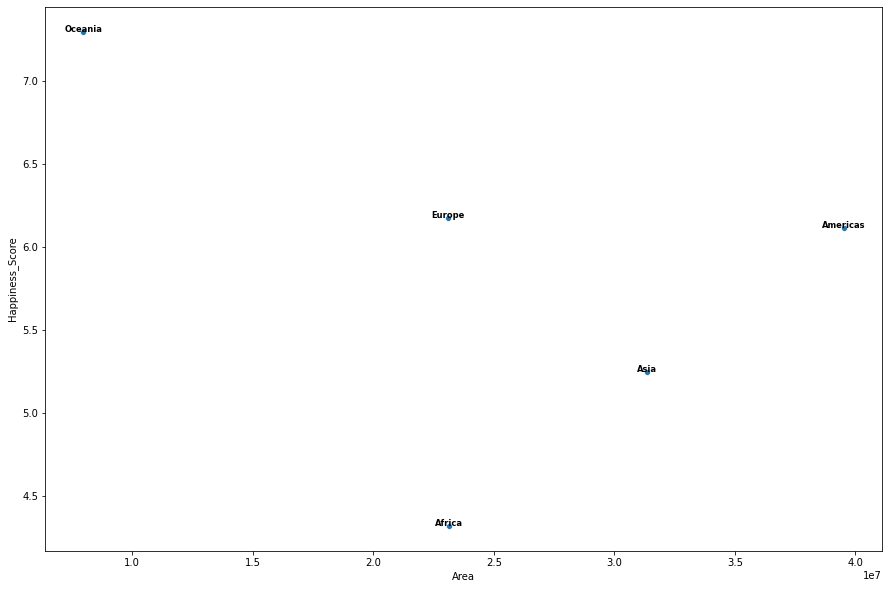

In [64]:
plt.figure(figsize = (15,10))

ax = sns.scatterplot( df_q1['Area'],df_q1['Happiness_Score'], legend=False)
# ax.set_xlim(60,90)
# ax.set_ylim(3, 9)

#For each point, we add a text inside the bubble
for line in range(0, df_q1.shape[0]):
     ax.text( df_q1['Area'].iloc[line],df_q1['Happiness_Score'].iloc[line], df_q1['Region'].iloc[line], horizontalalignment='center', size='small', color='black', weight='semibold')

<a id="1d"></a>
### Fig_1D

(60.0, 90.0)

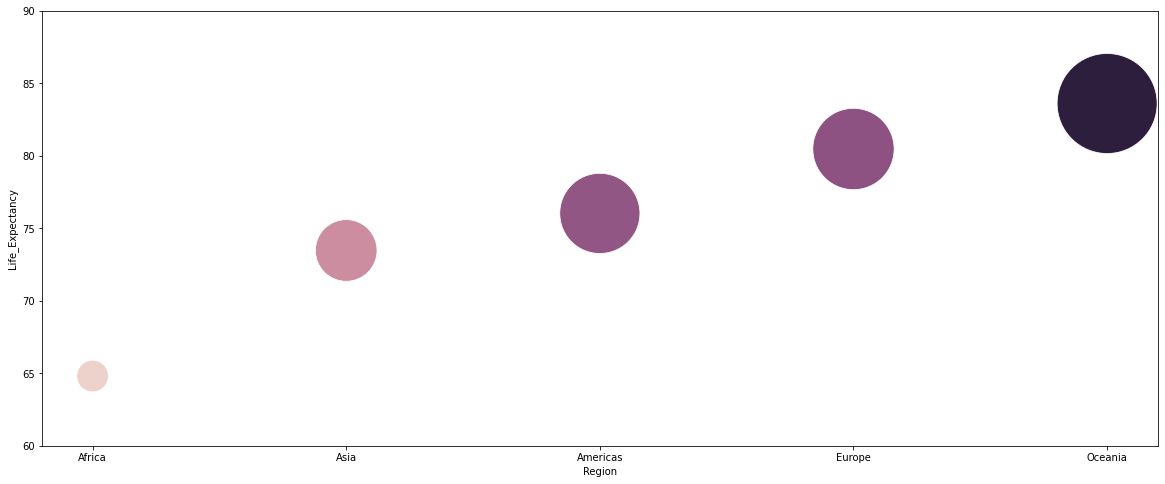

In [65]:
df_q1_copy=df_q1.copy()
df_q1_copy.sort_values(by='Life_Expectancy', inplace=True)

plt.figure(figsize=(20,8))
sns.scatterplot(data=df_q1_copy, x="Region", y="Life_Expectancy", hue="Happiness_Score",size="Happiness_Score",sizes=(1000, 10000), legend=False)
plt.ylim((60,90))


## Question 2: What is the happiness factor that contributes the most to the happiness score, based on the Region?

We will perform scalling on the columns in happiness as they are percentage of contribution to the happiness scale,
which makes sense to be values from 0 to 1 consistently.

In [66]:
df_scaled = df_mergedThree.copy()
columnsInHappiness = ['Economy_GDP_per_Capita', 'Family', 'Freedom', 'Generosity', 'Health_Life_Expectancy', 'Trust_Government_Corruption']
# Perfoming min max scalling to these columns and saving it a new scaled dataset.
# This is to ensure that these columns abide to the same range of values,
# leading to better visualisations and easier comparisons.
df_scaled[columnsInHappiness] = MinMaxScaler().fit_transform(df_scaled[columnsInHappiness])

The [figure](#2a) below shows us the contribution of each happiness factor in each region. It is visible that the happiness factors that contribute the most are the Family, Freedom and Health_Life_Expectancy. This means that there is a direct relationship between these vactors and the happiness score.

<a id="2a"></a>
### Fig_2A

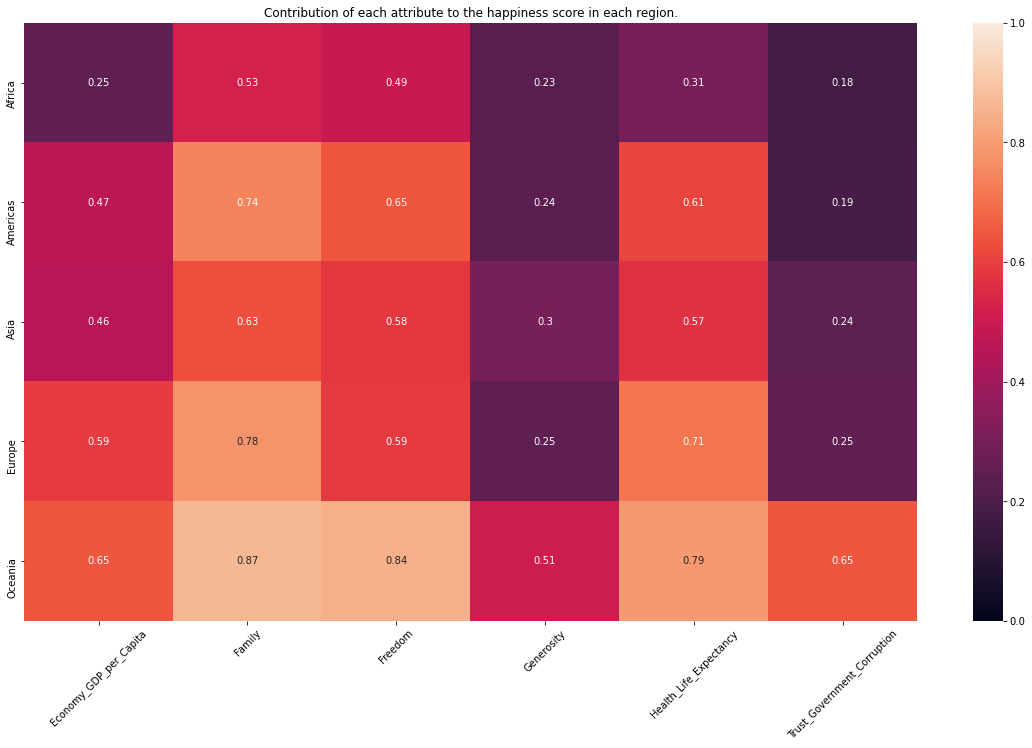

In [67]:
dic = {}
for col in columnsInHappiness:
    arr = []
    for region in regions:
        mean = df_scaled[df_scaled['Region'] == region][col].mean()
        arr.append(mean)
    dic[col] = arr

df_q2 = pd.DataFrame(dic)
plt.figure(figsize=(20, 11))
plt.title("Contribution of each attribute to the happiness score in each region.")
plt.yticks(rotation=0) 
plt.xticks(rotation=45)
ax = sns.heatmap(df_q2, annot=True, vmin=0, vmax=1)
ax.set_yticklabels(regions)
plt.show()

## Question 3: What is the count of countries with life expectancy less/greater than the total average in each year?

In [68]:
df_researchQuestion3 = df_mergedThree.copy()
averageLifeExpectanciesPerYear = []
years = np.concatenate([np.array([[2015]]), years_predict]).flatten()
average = []
for year in years:
    averageLifeExpectanciesPerYear.append(df_researchQuestion3[df_researchQuestion3['Year'] == year]['Life_Expectancy'].mean())
for currentYear, lifeExpectancy in zip(df_researchQuestion3['Year'], df_researchQuestion3['Life_Expectancy']):
    if(currentYear == '2015'):
        if(lifeExpectancy < averageLifeExpectanciesPerYear[0]):
            average.append('Below average')
        else:
            average.append('Above average')
    elif(currentYear == '2016'):
        if(lifeExpectancy < averageLifeExpectanciesPerYear[1]):
            average.append('Below average')
        else:
            average.append('Above average')
    elif(currentYear == '2017'):
        if(lifeExpectancy < averageLifeExpectanciesPerYear[2]):
            average.append('Below average')
        else:
            average.append('Above average')
    elif(currentYear == '2018'):
        if(lifeExpectancy < averageLifeExpectanciesPerYear[3]):
            average.append('Below average')
        else:
            average.append('Above average')
    else:
        if(lifeExpectancy < averageLifeExpectanciesPerYear[4]):
            average.append('Below average')
        else:
            average.append('Above average')

d = {'Country': df_researchQuestion3['Country'], 'Year': df_researchQuestion3['Year'], 'AverageComparison': average}
df_temp = pd.DataFrame(d)
df_yearAverageRelation = pd.DataFrame(columns = ['Years','Above/Below','Count'])
for year in years:
    insert_loc = df_yearAverageRelation.index.max()
    if pd.isna(insert_loc):
        df_yearAverageRelation.loc[0] = [year,'Above',int(df_temp[(df_temp['Year'] == year) & 
        (df_temp['AverageComparison'] == 'Above average')]['AverageComparison'].count())]
        
        df_yearAverageRelation.loc[1] = [year,'Below',int(df_temp[(df_temp['Year'] == year) & 
        (df_temp['AverageComparison'] == 'Below average')]['AverageComparison'].count())]
    else:
        df_yearAverageRelation.loc[insert_loc + 1] = [year, 'Above', int(df_temp[(df_temp['Year'] == year) & 
        (df_temp['AverageComparison'] == 'Above average')]['AverageComparison'].count())]
        
        df_yearAverageRelation.loc[insert_loc + 2] = [year, 'Below', int(df_temp[(df_temp['Year'] == year) & 
        (df_temp['AverageComparison'] == 'Below average')]['AverageComparison'].count())]
        
df_yearAverageRelation['Count'] = pd.to_numeric(df_yearAverageRelation['Count'])

In the [below](#3a) figure, it is clear that the count of countries with life expectancies higher than the global average is more than countries with life expectancy ages below average.

<a id="3a"></a>
### Fig_3A

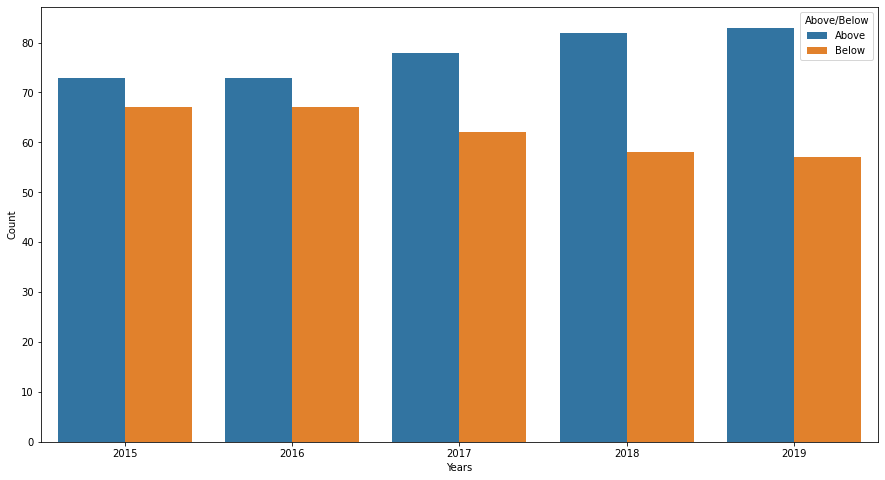

In [69]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="Years", y="Count", hue="Above/Below",data=df_yearAverageRelation)

## Question 4: Number of deaths by Measles in each region.

Relating [Fig_4A](#4a) and [Fig_4B](#4b) togther, we can observe that the two regions with the most amount of death by measles are Asia and Africa, which is due to the fact that they are the regions with the lowest number of developed countries in them, which is visible by observing it against the percentage of developed countries in each region.

<a id="4a"></a>
## Fig_4A
The figure below shows each region along with the number of measles deaths in this region.

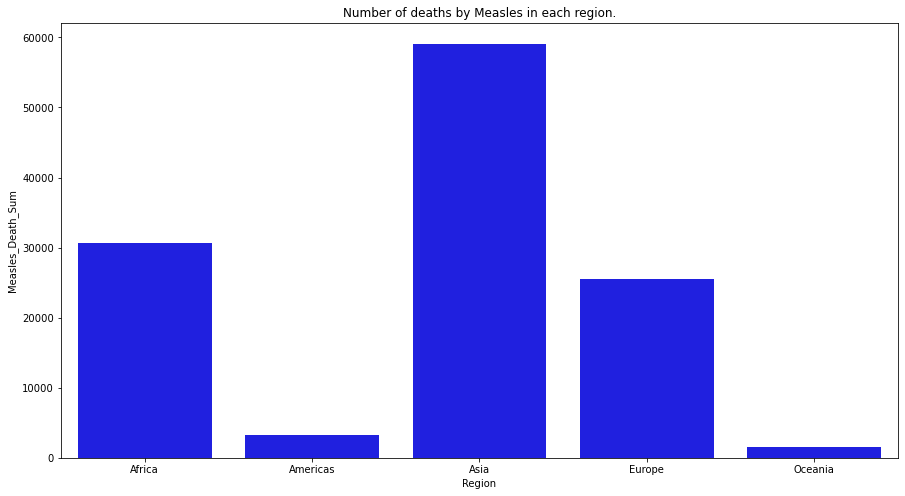

In [70]:
arr = []
for region in regions:
    sum = df_mergedThree[df_mergedThree['Region'] == region]['Measles'].sum()
    arr.append(sum)
df_q4 = pd.DataFrame({'Region': regions, 'Measles_Death_Sum': arr})
# df_q4.sort_values('Measles_Death_Sum', inplace=True, ascending=False)
plt.figure(figsize=(15, 8))
plt.title("Number of deaths by Measles in each region.")
sns.barplot(x='Region', y='Measles_Death_Sum', data=df_q4, color='Blue')

<a id="4b"></a>
## Fig_4B
The figure below shows each region along with the percentage of developed countries in each region.

[0.0, 4.3478260869565215, 5.0, 69.23076923076923, 100.0]


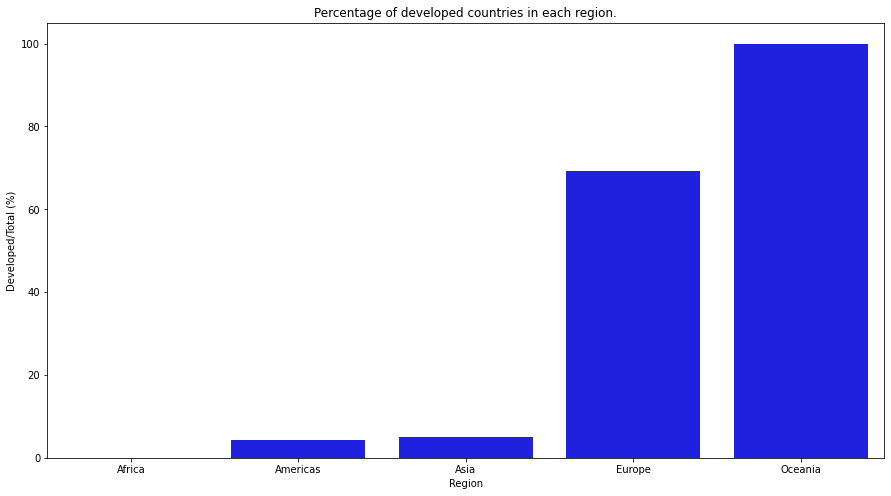

In [71]:
arr = []
allCountriesSum = []
for region in regions:
    sumDeveloped = df_mergedThree[(df_mergedThree['Region'] == region) & 
                                  (df_mergedThree['Status'] == 'Developed')]['Country'].count()
    sumAll = df_mergedThree[df_mergedThree['Region'] == region]['Country'].count()
    arr.append((sumDeveloped / sumAll) * 100)
print(arr)
df_q4b = pd.DataFrame({'Region': regions, 'Developed/Total (%)': arr})
plt.figure(figsize=(15, 8))
plt.title("Percentage of developed countries in each region.")
sns.barplot(x='Region', y='Developed/Total (%)', data=df_q4b, color='Blue')

## Question 5: What is the ranking of Egypt based on the happiness score over the years?

In [72]:
df_mergedThree_copy = df_mergedThree.copy()
df_mergedThree_copy = df_mergedThree_copy[['Country', 'Year', 'Happiness_Score']]
df_mergedThree_2015 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2015]
df_mergedThree_2016 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2016]
df_mergedThree_2017 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2017]
df_mergedThree_2018 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2018]
df_mergedThree_2019 = df_mergedThree_copy[df_mergedThree_copy['Year'] == 2019]

pd.set_option('mode.chained_assignment', None) # --> to ignore a warning as we understand the consequences.
df_mergedThree_2015.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2015['Happiness_Rank'] = list(range(1, len(df_mergedThree_2015) + 1))

df_mergedThree_2016.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2016['Happiness_Rank'] = list(range(1, len(df_mergedThree_2016) + 1))

df_mergedThree_2017.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2017['Happiness_Rank'] = list(range(1, len(df_mergedThree_2017) + 1))

df_mergedThree_2018.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2018['Happiness_Rank'] = list(range(1, len(df_mergedThree_2018) + 1))

df_mergedThree_2019.sort_values('Happiness_Score', inplace=True)
df_mergedThree_2019['Happiness_Rank'] = list(range(1, len(df_mergedThree_2019) + 1))

rankArr = [
    int(df_mergedThree_2015[df_mergedThree_2015['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2016[df_mergedThree_2016['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2017[df_mergedThree_2017['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2018[df_mergedThree_2018['Country'] == 'Egypt']['Happiness_Rank']),
    int(df_mergedThree_2019[df_mergedThree_2019['Country'] == 'Egypt']['Happiness_Rank'])
    ]

df_Egypt = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019], 'Happiness_Rank': rankArr})

In the below [figure](#5a), smaller bars are better, as this displays the ranking which is better when it is a smaller value. The figure shows that Egypt, as a country, was happier in years 2015 and 2019. With a relatively un-happy year in 2017 (which is probably directly correlated to the economic state of Egypt at the time due to the currency devaluation against the U.S Dollar).

<a id="5a"></a>
## Fig_5A

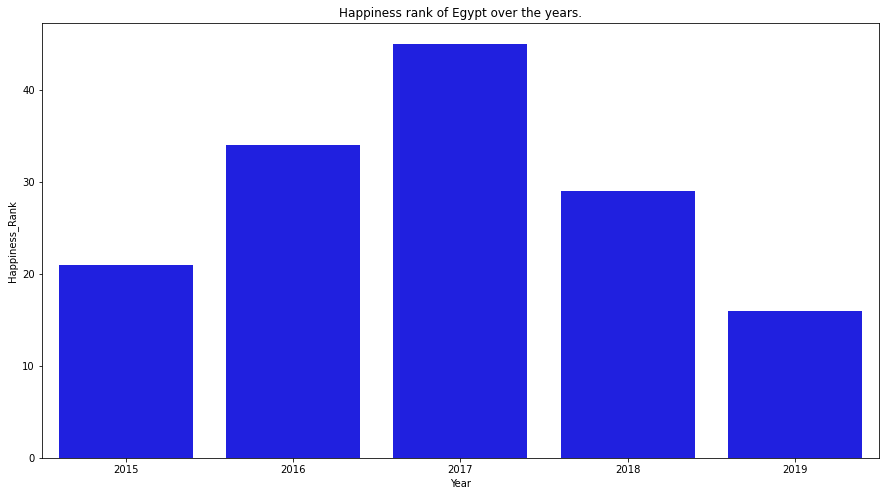

In [73]:
plt.figure(figsize=(15, 8))
plt.title("Happiness rank of Egypt over the years.")
sns.barplot(x='Year', y='Happiness_Rank', data=df_Egypt, color='Blue')

# 6) Integrating with an external dataset to get accurate population information.
#### Source: https://population.un.org/wpp/Download/Standard/Population/ 

## Explorting the dataset.

In [74]:
df_population = pd.read_excel(r'external datasets/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', engine='openpyxl', index_col=0)
df_population.head(40)

618      846.915   
17                                                          ...          ...   
18                                                       232328       237097   
19                                                  1.43582e+06  1.46483e+06   
20                                                       554325       559694   
21                                                       173280       177916   
22                                                       175017       177778   
23                                                      13265.7      13542.6   
24                                                          ...          ...   

                                                    Unnamed: 10  ...  \
NaN                                                         NaN  ...   
NaN                                                         NaN  ...   
NaN                                                         NaN  ...   
United Nations                                              NaN  ...   
Population Division                                         NaN  ...   
Department of Economic and Social Affairs                   NaN  ...   
NaN                                                         NaN  ...   
World Population Prospects 2019                             NaN  ...   
File POP/1-1: Total population (both sexes comb...          NaN  ...   
Estimates, 1950 - 2020                                      NaN  ...   
POP/DB/WPP/Rev.2019/POP/F01-1                               NaN  ...   
© August 2019 by United Nations, made available...          NaN  ...   
Suggested citation: United Nations, Department ...          NaN  ...   
NaN                                                         NaN  ...   
NaN                                                         NaN  ...   
Index                                                      1953  ...   
1                                                   2.67761e+06  ...   
2                                                           ...  ...   
3                                                        843788  ...   
4                                                   1.83382e+06  ...   
5                                                        206986  ...   
6                                                   1.62684e+06  ...   
7                                                   1.22944e+06  ...   
8                                                        110423  ...   
9                                                       25187.4  ...   
10                                                          ...  ...   
11                                                       720436  ...   
12                                                  1.81254e+06  ...   
13                                                  1.00441e+06  ...   
14                                                       808129  ...   
15                                                       143769  ...   
16                                                      868.472  ...   
17                                                          ...  ...   
18                                                       242092  ...   
19                                                  1.49289e+06  ...   
20                                                       565282  ...   
21                                                       182709  ...   
22                                                       180813  ...   
23                                                      13817.6  ...   
24                                                          ...  ...   

                                                    Unnamed: 68  Unnamed: 69  \
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
NaN                                                         NaN          NaN   
United Nations                                              NaN   

## Tidying & Cleaning.

In [75]:
df_population.columns = df_population.iloc[15]
df_population = df_population[16:]
df_population

Index    Variant Region, subregion, country or area * Notes Country code  \
1      Estimates                                WORLD   NaN          900   
2      Estimates                UN development groups     a         1803   
3      Estimates               More developed regions     b          901   
4      Estimates               Less developed regions     c          902   
5      Estimates            Least developed countries     d          941   
..           ...                                  ...   ...          ...   
285    Estimates                              Bermuda    14           60   
286    Estimates                               Canada   NaN          124   
287    Estimates                            Greenland    26          304   
288    Estimates            Saint Pierre and Miquelon     2          666   
289    Estimates             United States of America    35          840   

Index               Type Parent code         1950         1951         1952  \
1                  World           0  2.53643e+06  2.58403e+06  2.63086e+06   
2        Label/Separator         900          ...          ...          ...   
3      Development Group        1803       814819       824004       833720   
4      Development Group        1803  1.72161e+06  1.76003e+06  1.79714e+06   
5      Development Group         902       195428       199180       203015   
..                   ...         ...          ...          ...          ...   
285         Country/Area         918       37.256         37.8       38.437   
286         Country/Area         918      13733.4      14078.4      14445.5   
287         Country/Area         918       22.993       23.466       23.936   
288         Country/Area         918        4.567        4.609        4.648   
289         Country/Area         918       158804       160872       163266   

Index         1953  ...         2011         2012         2013         2014  \
1      2.67761e+06  ...  7.04119e+06  7.12583e+06  7.21058e+06  7.29529e+06   
2              ...  ...          ...          ...          ...          ...   
3           843788  ...  1.23956e+06  1.24411e+06  1.24845e+06  1.25262e+06   
4      1.83382e+06  ...  5.80164e+06  5.88171e+06  5.96213e+06  6.04268e+06   
5           206986  ...       856471       876867       897793       919223   
..             ...  ...          ...          ...          ...          ...   
285         39.142  ...       65.076       64.737       64.381       64.038   
286        14834.9  ...      34539.2        34922      35296.5      35664.3   
287         24.465  ...       56.555       56.477       56.412       56.383   
288          4.678  ...        6.323        6.251        6.168        6.073   
289         165910  ...       311584       314044       316401       318673   

Index         2015         2016         2017         2018         2019  \
1       7.3798e+06  7.46402e+06  7.54786e+06  7.63109e+06  7.71347e+06   
2              ...          ...          ...          ...          ...   
3      1.25662e+06  1.26048e+06  1.26415e+06  1.26756e+06  1.27063e+06   
4      6.12317e+06  6.20354e+06  6.28371e+06  6.36353e+06  6.44284e+06   
5           941131       963520       986385  1.00969e+06  1.03339e+06   
..             ...          ...          ...          ...          ...   
285         63.695        63.36        63.04       62.763       62.508   
286        36026.7      36382.9      36732.1      37074.6        37411   
287         56.378       56.408       56.473       56.565        56.66   
288          5.992        5.933        5.885        5.845        5.821   
289         320878       323016       325085       327096       329065   

Index         2020  
1       7.7948e+06  
2              ...  
3       1.2733e+06  
4      6.52149e+06  
5      1.05744e+06  
..             ...  
285         62.273  
286        37742.2  
287         56.772  
288          5.795  
289         331003  

[289 rows x 77 columns]

#### Dropping unwanted columns. Keeping only the country along with the needed years.

In [76]:
df_population = df_population[df_population['Type'] == 'Country/Area']
df_population = df_population.rename(columns = {
    'Region, subregion, country or area *':'Country'
})
df_population = df_population[['Country','2014','2015','2016','2017','2018','2019']]
df_population

Index                    Country     2014     2015     2016     2017     2018  \
27                       Burundi   9844.3    10160    10488    10827  11175.4   
28                       Comoros   759.39  777.435  795.597   813.89  832.322   
29                      Djibouti  898.707  913.998  929.117    944.1  958.923   
30                       Eritrea  3311.44  3342.82  3376.56  3412.89   3452.8   
31                      Ethiopia  98094.3   100835   103603   106400   109224   
..                           ...      ...      ...      ...      ...      ...   
285                      Bermuda   64.038   63.695    63.36    63.04   62.763   
286                       Canada  35664.3  36026.7  36382.9  36732.1  37074.6   
287                    Greenland   56.383   56.378   56.408   56.473   56.565   
288    Saint Pierre and Miquelon    6.073    5.992    5.933    5.885    5.845   
289     United States of America   318673   320878   323016   325085   327096   

Index     2019  
27     11530.6  
28     850.891  
29     973.557  
30     3497.12  
31      112079  
..         ...  
285     62.508  
286      37411  
287      56.66  
288      5.821  
289     329065  

[235 rows x 7 columns]

In [77]:
df_population = pd.melt(df_population, id_vars=['Country'], value_vars=df_population.columns[1:], value_name='Population')
df_population[df_population['Country'] == 'Egypt']
df_population

Country Index Population
0                       Burundi  2014     9844.3
1                       Comoros  2014     759.39
2                      Djibouti  2014    898.707
3                       Eritrea  2014    3311.44
4                      Ethiopia  2014    98094.3
...                         ...   ...        ...
1405                    Bermuda  2019     62.508
1406                     Canada  2019      37411
1407                  Greenland  2019      56.66
1408  Saint Pierre and Miquelon  2019      5.821
1409   United States of America  2019     329065

[1410 rows x 3 columns]

In [78]:
df_population.rename(columns={
    'Index': 'Year'
}, inplace=True)
df_population['Population'] = df_population['Population'] * 1000
df_population

Country  Year   Population
0                       Burundi  2014   9.8443e+06
1                       Comoros  2014       759390
2                      Djibouti  2014       898707
3                       Eritrea  2014  3.31144e+06
4                      Ethiopia  2014  9.80943e+07
...                         ...   ...          ...
1405                    Bermuda  2019        62508
1406                     Canada  2019   3.7411e+07
1407                  Greenland  2019        56660
1408  Saint Pierre and Miquelon  2019         5821
1409   United States of America  2019  3.29065e+08

[1410 rows x 3 columns]

### Integrating this dataset with the previous datasets in order to get information about the population in each country.

In [79]:
arr = set(countriesList_joinedThree).difference(getCountriesList(df_population))
print('In the list of all countries Not in population dataset', '(', len(arr), ')')
print(*arr, sep='\n')
arr2 = set(getCountriesList(df_population)).difference(countriesList_joinedThree)
print('In population dataset Not in the list of all countries', '(', len(arr2), ')')
print(*arr2, sep='\n')

In the list of all countries Not in population dataset ( 14 )
Syria
Russia
Congo (Brazzaville)
Ivory Coast
United States
Vietnam
Moldova
Venezuela
South Korea
Tanzania
Congo (Kinshasa)
Bolivia
Iran
Czech Republic
In population dataset Not in the list of all countries ( 109 )
Guadeloupe
Guam
Turks and Caicos Islands
Western Sahara
Wallis and Futuna Islands
Saint Vincent and the Grenadines
Democratic Republic of the Congo
Greenland
Fiji
Grenada
Martinique
North Macedonia
Timor-Leste
Côte d'Ivoire
Barbados
Marshall Islands
China, Macao SAR
Andorra
Cook Islands
United States Virgin Islands
Eswatini
French Polynesia
Isle of Man
Seychelles
Central African Republic
Tuvalu
Faroe Islands
Czechia
Mozambique
Comoros
Papua New Guinea
Micronesia (Fed. States of)
Niue
Aruba
Palau
Channel Islands
Tokelau
Montserrat
Djibouti
Cayman Islands
China, Taiwan Province of China
Republic of Moldova
Viet Nam
Republic of Korea
Saint Lucia
Tonga
Somalia
Puerto Rico
Bonaire, Sint Eustatius and Saba
Bermuda
Maldiv

In [80]:
df_population['Country'] = df_population['Country'].replace({
    'Iran (Islamic Republic of)':'Iran',
    'United Republic of Tanzania':'Tanzania',
    'Congo':'Congo (Brazzaville)',
    'Democratic Republic of the Congo':'Congo (Kinshasa)',
    'Russian Federation':'Russia',
    'United States of America':'United States',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    "Côte d'Ivoire":'Ivory Coast',
    'Viet Nam':'Vietnam',
    'Republic of Korea':'South Korea',
    'Syrian Arab Republic':'Syria',
    "Lao People's Democratic Republic":'Laos', 
    'Republic of Moldova':'Moldova',
    'Bolivia (Plurinational State of)':'Bolivia',
    'North Macedonia':'Macedonia',
    'Czechia':'Czech Republic'
    })
arr = set(countriesList_joinedThree).difference(getCountriesList(df_population))
print('In list of all countries and not in population dataset', '(', len(arr), ')')
print(*arr, sep='\n')
arr2 = set(getCountriesList(df_population)).difference(countriesList_joinedThree)
print('In population dataset and not in the list of all countries', '(', len(arr2), ')')
print(*arr2, sep='\n')

In list of all countries and not in population dataset ( 0 )

In population dataset and not in the list of all countries ( 95 )
Guadeloupe
Guam
Turks and Caicos Islands
Western Sahara
Wallis and Futuna Islands
Saint Vincent and the Grenadines
Greenland
Fiji
Grenada
Martinique
Timor-Leste
Barbados
Marshall Islands
China, Macao SAR
Andorra
Cook Islands
United States Virgin Islands
Eswatini
French Polynesia
Isle of Man
Laos
Seychelles
Central African Republic
Tuvalu
Faroe Islands
Mozambique
Comoros
Papua New Guinea
Micronesia (Fed. States of)
Niue
Aruba
Palau
Channel Islands
Tokelau
Montserrat
Djibouti
Cayman Islands
China, Taiwan Province of China
Saint Lucia
Tonga
Somalia
Puerto Rico
Bonaire, Sint Eustatius and Saba
Bermuda
Maldives
Brunei Darussalam
New Caledonia
French Guiana
Vanuatu
Northern Mariana Islands
Angola
Cabo Verde
Saint Barthélemy
Guinea-Bissau
Dominica
Monaco
Kiribati
Belize
British Virgin Islands
Antigua and Barbuda
Saint Kitts and Nevis
Cuba
Sudan
Bahamas
Curaçao
Oman
S

# Milestone 2: Feature Engineering.

## Feature 1: Calculating the population density of each country in each year.

In [81]:
df_mergerThree_intermediate = df_mergedThree.drop(['Population'], axis=1)
df_population['Year'] = df_population['Year'].astype(int)
df_mergedFour = pd.merge(df_mergerThree_intermediate, df_population, on=['Country', 'Year'], how='inner')
df_mergedFour.head(10)

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing        65.000000       263.000000   
1  Afghanistan  2016  Developing        62.020000       281.775000   
2  Afghanistan  2017  Developing        62.470147       283.270588   
3  Afghanistan  2018  Developing        62.920294       284.766176   
4  Afghanistan  2019  Developing        63.370441       286.261765   
5      Albania  2015  Developing        77.800000        74.000000   
6      Albania  2016  Developing        78.310000        83.600000   
7      Albania  2017  Developing        78.681029        88.133824   
8      Albania  2018  Developing        79.052059        92.667647   
9      Albania  2019  Developing        79.423088        97.201471   

   Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  ...  \
0      55.000000  899.000000  48.375000   65.000000       0.1  ...   
1      55.000000  729.500000  65.278125   69.257812       0.1  ...   
2      55.000000  719.926471  66.213419   70.350184       0.1  ...   
3      55.000000  710.352941  67.148713   71.442555       0.1  ...   
4      55.000000  700.779412  68.084007   72.534926       0.1  ...   
5       0.000000    0.000000  99.000000   99.000000       0.1  ...   
6       0.000000  -76.500000  99.275000   99.250000       0.1  ...   
7      -0.080882  -91.779412  99.410294   99.389706       0.1  ...   
8      -0.161765 -107.058824  99.545588   99.529412       0.1  ...   
9      -0.242647 -122.338235  99.680882   99.669118       0.1  ...   

   Trust_Government_Corruption  Region        Subregion      Area  Gini  \
0                     0.097190    Asia    Southern Asia  652230.0  27.8   
1                     0.071120    Asia    Southern Asia  652230.0  27.8   
2                     0.061158    Asia    Southern Asia  652230.0  27.8   
3                     0.036000    Asia    Southern Asia  652230.0  27.8   
4                     0.025000    Asia    Southern Asia  652230.0  27.8   
5                     0.064130  Europe  Southern Europe   28748.0  34.5   
6                     0.053010  Europe  Southern Europe   28748.0  34.5   
7                     0.039864  Europe  Southern Europe   28748.0  34.5   
8                     0.032000  Europe  Southern Europe   28748.0  34.5   
9                     0.027000  Europe  Southern Europe   28748.0  34.5   

   Real Growth Rating      Literacy Rate          Inflation  \
0   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
1   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
2   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
3   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
4   3.1% (2013 est.).  28.1% (2000 est.)  6.8% (2013 est.).   
5    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
6    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
7    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
8    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   
9    .7% (2013 est.).  98.7% (2011 est.)  1.7% (2013 est.).   

                                        Unemployment   Population  
0                                   35% (2008 est.).  3.44136e+07  
1                                   35% (2008 est.).   3.5383e+07  
2                                   35% (2008 est.).  3.62961e+07  
3                                   35% (2008 est.).  3.71719e+07  
4                                   35% (2008 est.).  3.80418e+07  
5  16.9% official rate (2013 est.). Note: These a...  2.89052e+06  
6  16.9% official rate (2013 est.). Note: These a...  2.88643e+06  
7  16.9% official rate (2013 est.). Note: These a...  2.88417e+06  
8  16.9% official rate (2013 est.). Note: These a...  2.88274e+06  
9  16.9% official rate (2013 est.). Note: These a...  2.88091e+06  

[10 rows x 29 columns]

In [82]:
df_mergedFour['Population_Density'] = df_mergedFour['Population'] / df_mergedFour['Area']
df_mergedFour['Population_Density'] = df_mergedFour['Population_Density'].astype(float)
df_mergedFour[['Country', 'Year', 'Population', 'Area', 'Population_Density']]

Country  Year   Population      Area  Population_Density
0    Afghanistan  2015  3.44136e+07  652230.0           52.762987
1    Afghanistan  2016   3.5383e+07  652230.0           54.249311
2    Afghanistan  2017  3.62961e+07  652230.0           55.649251
3    Afghanistan  2018  3.71719e+07  652230.0           56.992046
4    Afghanistan  2019  3.80418e+07  652230.0           58.325678
..           ...   ...          ...       ...                 ...
695     Zimbabwe  2015  1.38146e+07  390757.0           35.353537
696     Zimbabwe  2016  1.40303e+07  390757.0           35.905532
697     Zimbabwe  2017  1.42366e+07  390757.0           36.433382
698     Zimbabwe  2018  1.44388e+07  390757.0           36.950872
699     Zimbabwe  2019  1.46455e+07  390757.0           37.479746

[700 rows x 5 columns]

### Visualization for the population density.

In [83]:
df_population_density = pd.DataFrame(index= df_mergedFour['Year'].unique(), columns=df_mergedFour['Country'].unique())
df_population_density

Afghanistan Albania Algeria Argentina Armenia Australia Austria  \
2015         NaN     NaN     NaN       NaN     NaN       NaN     NaN   
2016         NaN     NaN     NaN       NaN     NaN       NaN     NaN   
2017         NaN     NaN     NaN       NaN     NaN       NaN     NaN   
2018         NaN     NaN     NaN       NaN     NaN       NaN     NaN   
2019         NaN     NaN     NaN       NaN     NaN       NaN     NaN   

     Azerbaijan Bahrain Bangladesh  ... United Kingdom Tanzania United States  \
2015        NaN     NaN        NaN  ...            NaN      NaN           NaN   
2016        NaN     NaN        NaN  ...            NaN      NaN           NaN   
2017        NaN     NaN        NaN  ...            NaN      NaN           NaN   
2018        NaN     NaN        NaN  ...            NaN      NaN           NaN   
2019        NaN     NaN        NaN  ...            NaN      NaN           NaN   

     Uruguay Uzbekistan Venezuela Vietnam Yemen Zambia Zimbabwe  
2015     NaN        NaN       NaN     NaN   NaN    NaN      NaN  
2016     NaN        NaN       NaN     NaN   NaN    NaN      NaN  
2017     NaN        NaN       NaN     NaN   NaN    NaN      NaN  
2018     NaN        NaN       NaN     NaN   NaN    NaN      NaN  
2019     NaN        NaN       NaN     NaN   NaN    NaN      NaN  

[5 rows x 140 columns]

In [84]:
for country in df_population_density.columns:
    df_population_density[country]= df_mergedFour[df_mergedFour['Country'] == country]['Population_Density'].tolist()
df_population_density

Afghanistan     Albania    Algeria  Argentina    Armenia  Australia  \
2015    52.762987  100.546960  16.680244  15.492525  98.361261   3.111340   
2016    54.249311  100.404446  17.025948  15.648273  98.717244   3.154269   
2017    55.649251  100.325901  17.377697  15.802454  99.007800   3.196118   
2018    56.992046  100.276019  17.730062  15.954953  99.241536   3.236879   
2019    58.325678  100.212641  18.076295  16.105839  99.442827   3.276537   

         Austria  Azerbaijan      Bahrain   Bangladesh  ...  United Kingdom  \
2015  103.476374  111.117102  1793.271895  1058.862147  ...      271.141000   
2016  104.294762  112.425416  1863.781699  1070.523487  ...      272.943368   
2017  105.160330  113.687252  1953.041830  1082.099485  ...      274.711663   
2018  106.012603  114.890727  2051.555556  1093.560432  ...      276.416953   
2019  106.772400  116.024469  2145.312418  1104.873436  ...      278.016307   

       Tanzania  United States    Uruguay  Uzbekistan  Venezuela     Vietnam  \
2015  54.473967      33.323843  18.847360   69.131775  32.824476  279.811969   
2016  56.131585      33.545845  18.914342   70.276605  32.572876  282.720539   
2017  57.836310      33.760690  18.983423   71.434452  32.083191  285.619612   
2018  59.585460      33.969589  19.053272   72.588806  31.520841  288.473724   
2019  61.375790      34.174038  19.121994   73.718630  31.115701  291.239774   

          Yemen     Zambia   Zimbabwe  
2015  50.188422  21.099013  35.353537  
2016  51.458062  21.742211  35.905532  
2017  52.720640  22.393488  36.433382  
2018  53.978050  23.055325  36.950872  
2019  55.234260  23.732061  37.479746  

[5 rows x 140 columns]

In [85]:
# Function to show the value of the bar on a bar graph.
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#### Visualising the population density of Egypt over the years. 
We can observe that it increases constantly over timespan from 2015 to 2019.

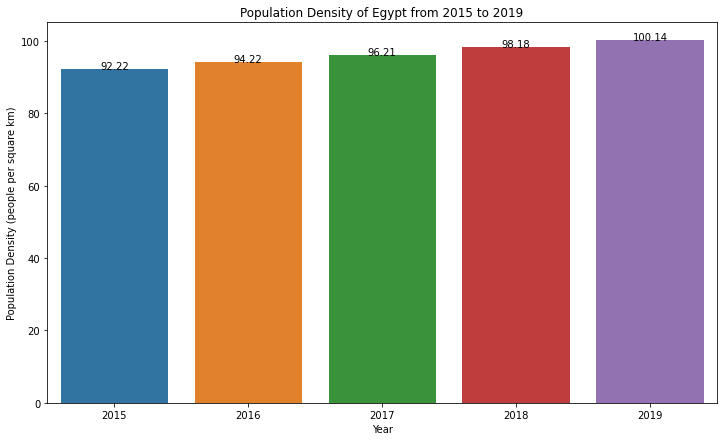

In [86]:
plt.figure(figsize=(12,7))
ax=sns.barplot(x=df_population_density.index, y=df_population_density['Egypt'])
plt.title("Population Density of Egypt from 2015 to 2019")
plt.xlabel("Year")
plt.ylabel("Population Density (people per square km)")
show_values_on_bars(ax)

#### Visualising the correlation between the population density and happiness score. 
We can observe that the population density is not related to the happiness score.

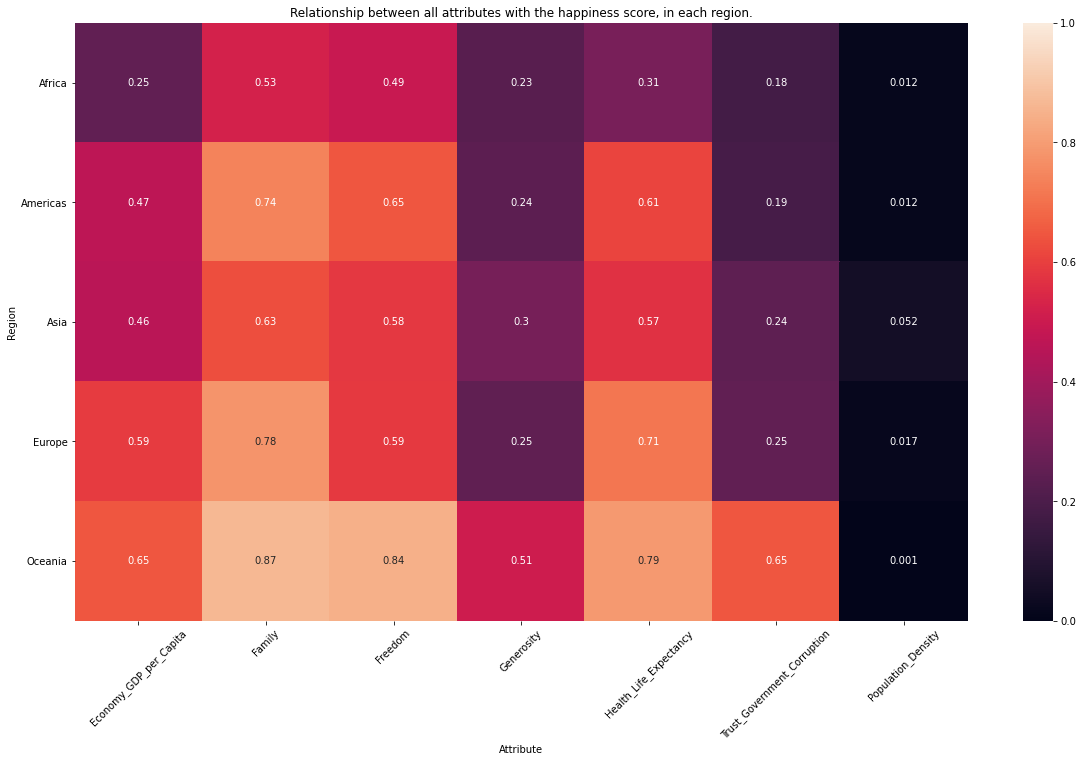

In [87]:
df_scaled = df_mergedFour.copy()
columns = ['Economy_GDP_per_Capita', 'Family', 'Freedom', 'Generosity', 'Health_Life_Expectancy', 'Trust_Government_Corruption', 'Population_Density']
# Perfoming min max scalling to these columns and saving it a new scaled dataset.
# This is to ensure that these columns abide to the same range of values,
# leading to better visualisations and easier comparisons.
df_scaled[columns] = MinMaxScaler().fit_transform(df_scaled[columns])
dic = {}
for col in columns:
    arr = []
    for region in regions:
        mean = df_scaled[df_scaled['Region'] == region][col].mean()
        arr.append(mean)
    dic[col] = arr

df_f2 = pd.DataFrame(dic)
plt.figure(figsize=(20, 11))
ax = sns.heatmap(df_f2, annot=True, vmin=0, vmax=1)
ax.set_yticklabels(regions)
plt.title("Relationship between all attributes with the happiness score, in each region.")
plt.xlabel("Attribute")
plt.yticks(rotation=0) 
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.show()

#### Visualising all attributes against each other using scatter plots.

Text(0.5, 1.08, 'Scatter plot matrix of many attributes.')

<Figure size 6480x8640 with 0 Axes>

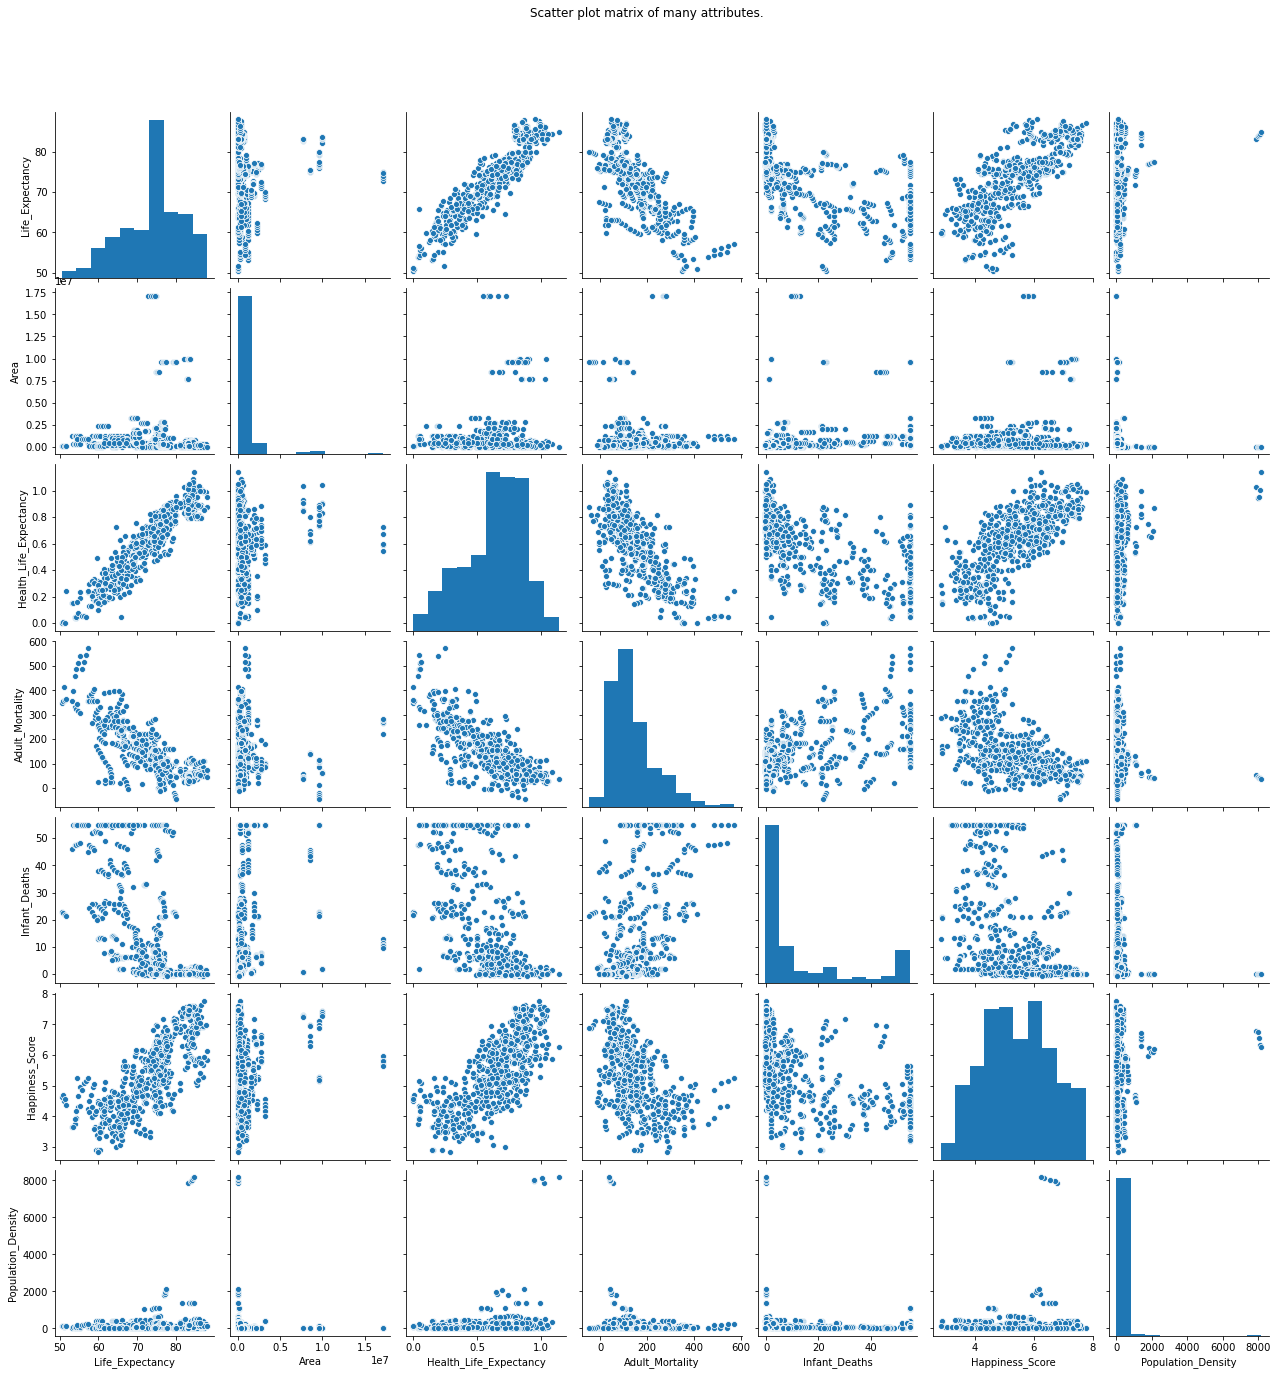

In [88]:
plt.figure(figsize=(90, 120))
# plt.title("Scatter plot matrix of many attributes.")
ax=sns.pairplot(df_mergedFour[['Life_Expectancy', 'Area', 'Health_Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Happiness_Score', 'Population_Density']])
ax.fig.suptitle('Scatter plot matrix of many attributes.',y=1.08)

## Feature 2: Calculating the growth rate of life expectancy for each country every year.

In [89]:
# To get the life expectancy values from 2014 (as it is not in the merged dataset)
df_lifeExpectancy2014 = df_lifeExpectancyComplete.copy()

df_f2 = df_mergedThree.copy()
countries = [*df_f2['Country'].unique()]
growth_rates = []
for country in countries:
    life_exp_2014 = df_lifeExpectancy2014[(df_lifeExpectancy2014['Country'] == country) & (df_lifeExpectancy2014['Year'] == 2014)]['Life_Expectancy'].item()
    life_exp_2015 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2015)]['Life_Expectancy'].item()
    life_exp_2016 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2016)]['Life_Expectancy'].item()
    life_exp_2017 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2017)]['Life_Expectancy'].item()
    life_exp_2018 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2018)]['Life_Expectancy'].item()
    life_exp_2019 = df_f2[(df_f2['Country'] == country) & (df_f2['Year'] == 2019)]['Life_Expectancy'].item()

    growth_rates.append((life_exp_2015 / life_exp_2014) - 1)
    growth_rates.append((life_exp_2016 / life_exp_2015) - 1)
    growth_rates.append((life_exp_2017 / life_exp_2016) - 1)
    growth_rates.append((life_exp_2018 / life_exp_2017) - 1)
    growth_rates.append((life_exp_2019 / life_exp_2018) - 1)

In [90]:
# Changing the rate to be a percentage (by multiplying by 100)
percentage_growth_rates = [rate * 100 for rate in growth_rates]

In [91]:
df_mergedThree['Life_Exp_Growth_Rate'] = percentage_growth_rates
df_mergedThree.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing        65.000000       263.000000   
1  Afghanistan  2016  Developing        62.020000       281.775000   
2  Afghanistan  2017  Developing        62.470147       283.270588   
3  Afghanistan  2018  Developing        62.920294       284.766176   
4  Afghanistan  2019  Developing        63.370441       286.261765   

   Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  ...  Region  \
0           55.0  899.000000  48.375000   65.000000       0.1  ...    Asia   
1           55.0  729.500000  65.278125   69.257812       0.1  ...    Asia   
2           55.0  719.926471  66.213419   70.350184       0.1  ...    Asia   
3           55.0  710.352941  67.148713   71.442555       0.1  ...    Asia   
4           55.0  700.779412  68.084007   72.534926       0.1  ...    Asia   

       Subregion  Population      Area  Gini  Real Growth Rating  \
0  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
1  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
2  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
3  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   
4  Southern Asia    27657145  652230.0  27.8   3.1% (2013 est.).   

       Literacy Rate          Inflation      Unemployment  \
0  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
1  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
2  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
3  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   
4  28.1% (2000 est.)  6.8% (2013 est.).  35% (2008 est.).   

   Life_Exp_Growth_Rate  
0              8.514190  
1             -4.584615  
2              0.725810  
3              0.720579  
4              0.715424  

[5 rows x 30 columns]

### Visualization for the Life Expectancy Growth Rate feature.

In [92]:
series_f2 = df_mergedThree.groupby(['Region'])['Life_Exp_Growth_Rate'].mean()
series_f2

Region
Africa      1.078062
Americas    0.324247
Asia        0.403200
Europe      0.310634
Oceania     0.539511
Name: Life_Exp_Growth_Rate, dtype: float64

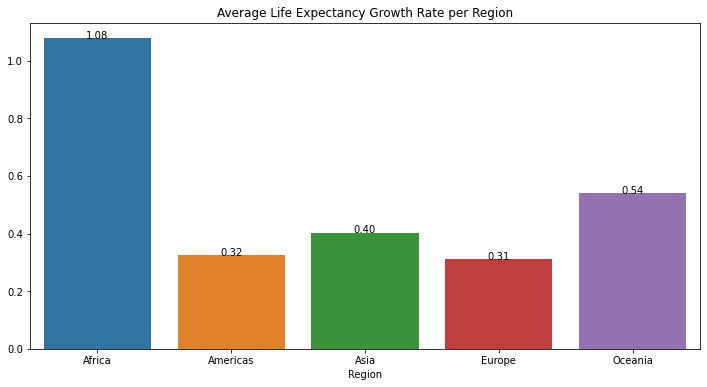

In [93]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=series_f2.index, y=series_f2.values)
plt.title("Average Life Expectancy Growth Rate per Region")
show_values_on_bars(ax)

## New Feature 3: Calculating the population growth rate for each country every year. 
We will then compare the total change for each region from 2014 to 2019 with the area of the region and population growth rate.

In [94]:
df_f3 = df_mergedFour.copy()
countriesAvailable = [*df_f3['Country'].unique()]
population_rates = []
for country in countriesAvailable:
    population_2014 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2014)]['Population'].item()
    population_2015 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2015)]['Population'].item()
    population_2016 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2016)]['Population'].item()
    population_2017 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2017)]['Population'].item()
    population_2018 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2018)]['Population'].item()
    population_2019 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2019)]['Population'].item()

    population_rates.append((population_2015 / population_2014) - 1)
    population_rates.append((population_2016 / population_2015) - 1)
    population_rates.append((population_2017 / population_2016) - 1)
    population_rates.append((population_2018 / population_2017) - 1)
    population_rates.append((population_2019 / population_2018) - 1)

In [95]:
df_f3['Population_Growth_Rate'] = population_rates
df_f3.head()

Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing        65.000000       263.000000   
1  Afghanistan  2016  Developing        62.020000       281.775000   
2  Afghanistan  2017  Developing        62.470147       283.270588   
3  Afghanistan  2018  Developing        62.920294       284.766176   
4  Afghanistan  2019  Developing        63.370441       286.261765   

   Infant_Deaths     Measles      Polio  Diphtheria  HIV/AIDS  ...  \
0           55.0  899.000000  48.375000   65.000000       0.1  ...   
1           55.0  729.500000  65.278125   69.257812       0.1  ...   
2           55.0  719.926471  66.213419   70.350184       0.1  ...   
3           55.0  710.352941  67.148713   71.442555       0.1  ...   
4           55.0  700.779412  68.084007   72.534926       0.1  ...   

       Subregion      Area  Gini  Real Growth Rating      Literacy Rate  \
0  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
1  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
2  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
3  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   
4  Southern Asia  652230.0  27.8   3.1% (2013 est.).  28.1% (2000 est.)   

           Inflation      Unemployment   Population  Population_Density  \
0  6.8% (2013 est.).  35% (2008 est.).  3.44136e+07           52.762987   
1  6.8% (2013 est.).  35% (2008 est.).   3.5383e+07           54.249311   
2  6.8% (2013 est.).  35% (2008 est.).  3.62961e+07           55.649251   
3  6.8% (2013 est.).  35% (2008 est.).  3.71719e+07           56.992046   
4  6.8% (2013 est.).  35% (2008 est.).  3.80418e+07           58.325678   

   Population_Growth_Rate  
0                0.031249  
1                0.028170  
2                0.025806  
3                0.024130  
4                0.023400  

[5 rows x 31 columns]

In [96]:
df_population_changeLast5Years = pd.DataFrame(columns=['Country', 'PopulationChange'])
df_population_changeLast5Years['Country'] = df_mergedFour['Country'].unique()

countriesAvailable = [*df_population_changeLast5Years['Country'].unique()]
population_changes = []
for country in countriesAvailable:
    population_2014 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2014)]['Population'].item()
    population_2019 = df_population[(df_population['Country'] == country) & (df_population['Year'] == 2019)]['Population'].item()
    population_changes.append((population_2019 / population_2014) - 1)

In [97]:
df_population_changeLast5Years['PopulationChange'] = population_changes
df_population_changeLast5Years.head()

Country  PopulationChange
0  Afghanistan          0.139971
1      Albania         -0.005315
2      Algeria          0.106089
3    Argentina          0.050265
4      Armenia          0.015563

In [98]:
totalPopulationGrowthinRegions = []
totalPopulationInRegions = []
averagePopulationChangePerRegion = []
totalPopulationInRegionsAfter = []
totalRegionArea = []
year = [2014,2019] * 5
regionsAvailable = [*df_f3['Region'].unique()]
for region in regionsAvailable: 
    countriesInRegion = [*df_f3[df_f3['Region'] == region]['Country'].unique()]
    totalRegionArea += [((df_f3[df_f3['Region'] == region]['Area']).sum() / 1000)]
    totalPopulation = 0
    totalPopulationGrowth = 0
    for country in countriesInRegion:
        totalPopulationGrowth = totalPopulationGrowth + (df_f3[df_f3['Country'] == country]['Population_Growth_Rate'] *df_f3[df_f3['Country'] == country]['Population']).sum()
        totalPopulation = totalPopulation + (df_f3[df_f3['Country'] == country]['Population']).sum()
    totalPopulation = totalPopulation - totalPopulationGrowth
    totalPopulationGrowthinRegions += [totalPopulationGrowth / 1000000]
    totalPopulationInRegions += [totalPopulation / 1000000]
    totalPopulation = totalPopulation + totalPopulationGrowth
    totalPopulationInRegionsAfter += [totalPopulation / 1000000]

    averagePopulationChangePerRegion = averagePopulationChangePerRegion + [(totalPopulationGrowth / totalPopulation)]
print('regionsAvailable', regionsAvailable)
print('totalRegionArea', totalRegionArea)
print('totalPopulationInRegions', totalPopulationInRegions)
print('totalPopulationGrowthinRegions', totalPopulationGrowthinRegions)
print('averagePopulationChangePerRegion', averagePopulationChangePerRegion)
# display(regionsAvailable, totalRegionArea, totalPopulationInRegions, totalPopulationGrowthinRegions, averagePopulationChangePerRegion)

regionsAvailable ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
totalRegionArea [156699.335, 115486.125, 115690.12, 197644.38, 39812.455]
totalPopulationInRegions [21996.679856324587, 3713.758229627946, 5342.162594726806, 4849.966269362301, 144.53752599773168]
totalPopulationGrowthinRegions [210.88279467541477, 5.464632372053955, 141.07014827319418, 43.4810576376991, 1.8456690022683286]
averagePopulationChangePerRegion [0.009495990081825516, 0.001469294144184564, 0.02572755067770687, 0.008885567726005504, 0.012608476008932095]


Creating a dataframe containing the population on 2014 and on 2019, with the difference between them and the average of population change per region.

In [99]:
df_population_trend_regionBase = pd.DataFrame(columns=['Region','Area (thousand-km2)','Total Population 2014 (millions)','Total Population 2019 (millions)','Population Difference (millions)','Average Population Change'])
df_population_trend_regionBase['Region'] = regionsAvailable
df_population_trend_regionBase['Area (thousand-km2)'] = totalRegionArea
df_population_trend_regionBase['Total Population 2014 (millions)'] = totalPopulationInRegions
df_population_trend_regionBase['Total Population 2019 (millions)'] = totalPopulationInRegionsAfter
df_population_trend_regionBase['Population Difference (millions)'] = totalPopulationGrowthinRegions
df_population_trend_regionBase['Average Population Change'] = averagePopulationChangePerRegion
display(df_population_trend_regionBase)

Region  Area (thousand-km2)  Total Population 2014 (millions)  \
0      Asia           156699.335                      21996.679856   
1    Europe           115486.125                       3713.758230   
2    Africa           115690.120                       5342.162595   
3  Americas           197644.380                       4849.966269   
4   Oceania            39812.455                        144.537526   

   Total Population 2019 (millions)  Population Difference (millions)  \
0                      22207.562651                        210.882795   
1                       3719.222862                          5.464632   
2                       5483.232743                        141.070148   
3                       4893.447327                         43.481058   
4                        146.383195                          1.845669   

   Average Population Change  
0                   0.009496  
1                   0.001469  
2                   0.025728  
3                   0.008886  
4                   0.012608

Plotting the data with the area on x-axis, and the average population change on the y-axis. Including the difference of population as the size of the dot. In addition to having different colours for different regions. 
As visible on the plot, the area of the region is not relation with the population change, for example a place like Europe with area 4 times larger than Ocenia, it have approximately the same change in population number visible as the size of the circle, but compared to population change Ocenia has a much higher rate of population growth. It is also visible that despite the size of Africa is not the largest, but it have the highest average population change over the 5 years which can be due to having the highest fertility rate (according to the United Nations).

#### Visualization for the population trend

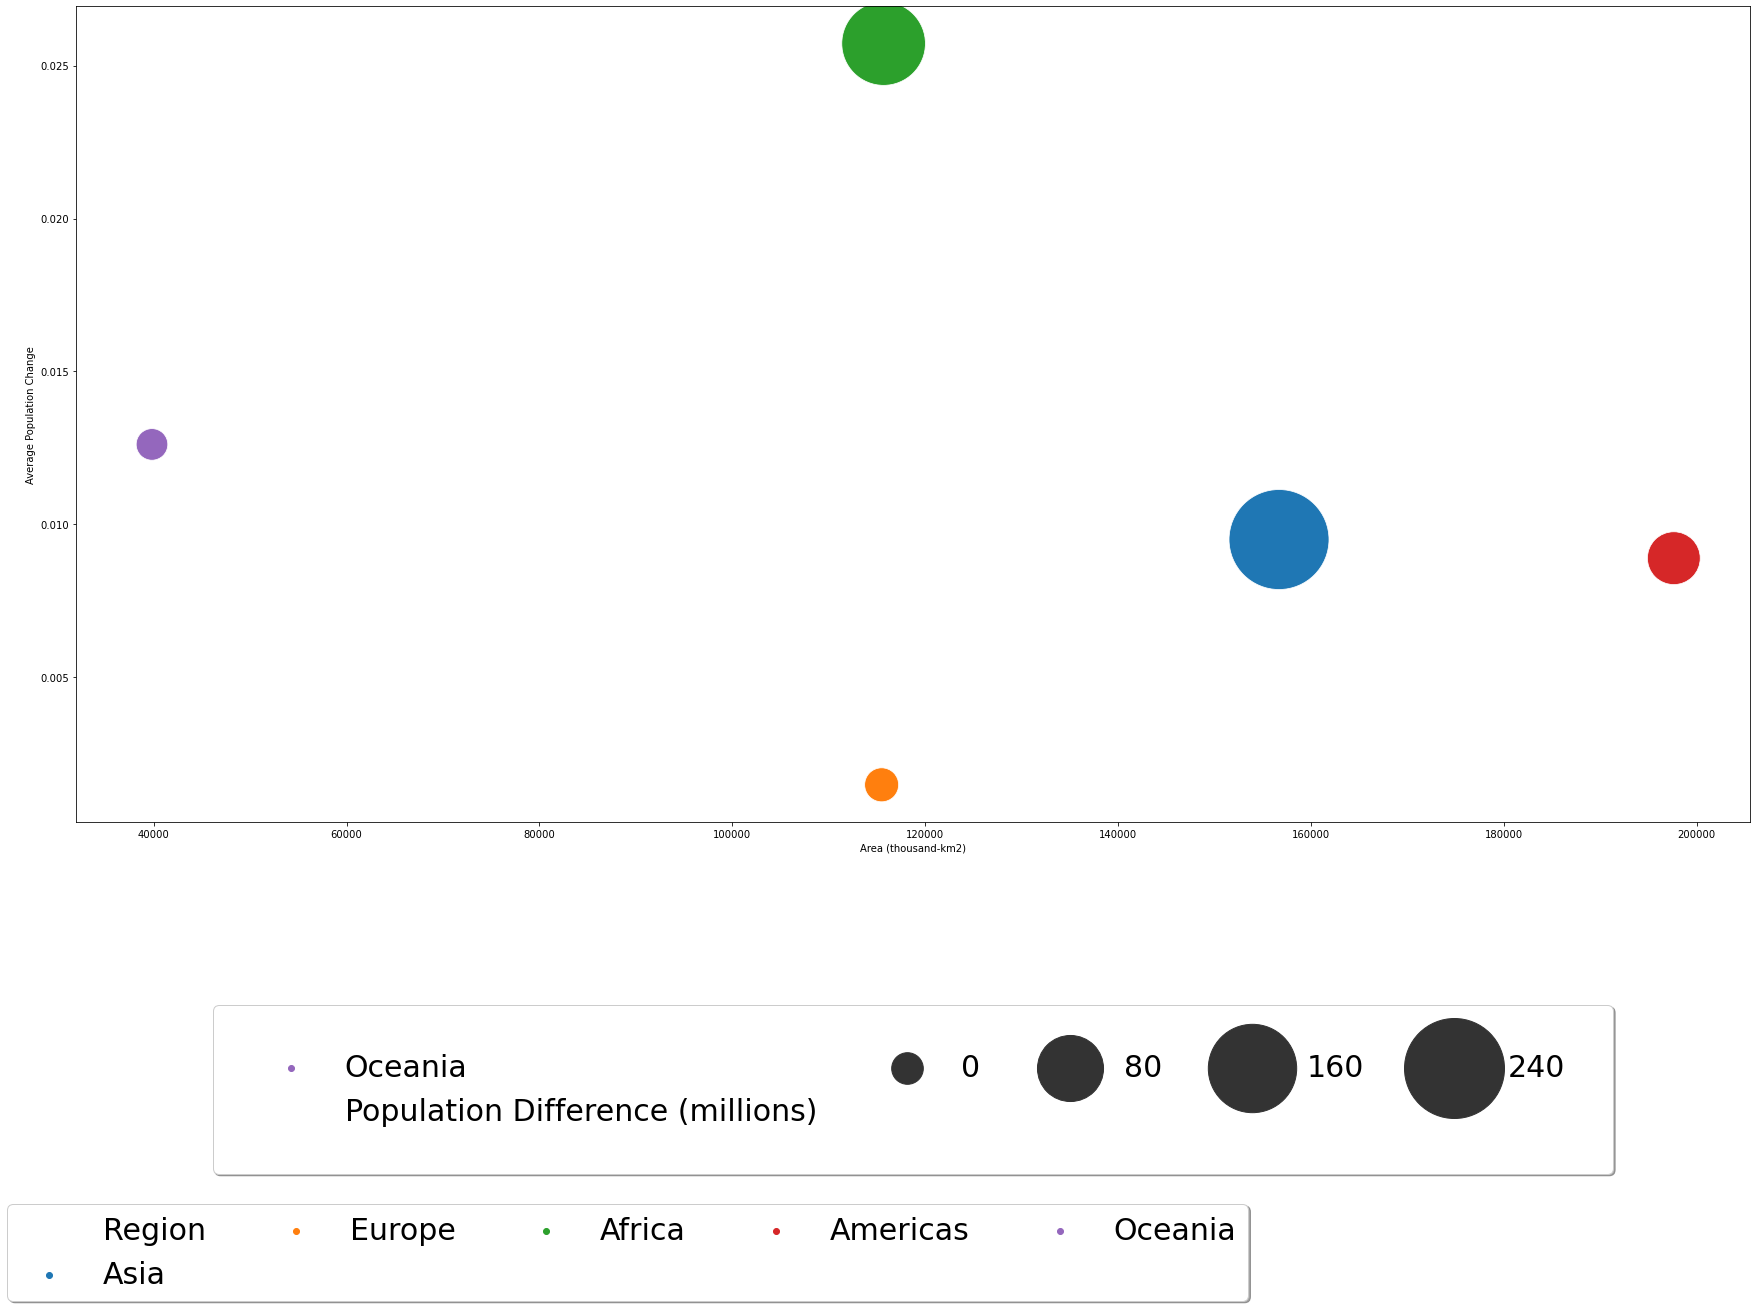

In [100]:
plt.figure(figsize=(30,15))
# plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.rc('legend', loc="upper right") 
ax=sns.scatterplot(
    x="Area (thousand-km2)",
    y="Average Population Change",
    size="Population Difference (millions)",
    hue="Region",
    data=df_population_trend_regionBase,
    sizes=(1000, 10000),
    legend='brief',
)
plt.rcParams["axes.labelsize"] = 15
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(h[:6], l[:6], loc='upper left', 
                     bbox_to_anchor=(-0.05, -0.45), prop={'size': 30}, fancybox=True, shadow=True, ncol=5)
size_lgd = plt.legend(h[-6:], l[-6:], loc='lower center', borderpad=1.6, prop={'size': 30},
                      bbox_to_anchor=(0.5,-0.45), fancybox=True, shadow=True, ncol=5)
plt.gca().add_artist(col_lgd)
plt.show()

# Milestone 3: Analyzing Twitter data over the course of 4 days.

In this milestone we were supposed to create a create a pipeline using Airflow. This pipeline which was scheduled to run daily for 4 days (we also ran it for 2 extra days) and performed the following steps:

1. Fetching 50 tweets from 2 different countries, a country that we categorized as unhappy (Egypt) and a country that was categorized as happy (Canada). This was found out using the previous analysis in milestone 2.
2. We performed some text cleaning. We disregarded retweets, removed links and emojis.
3. We performed sentiment analysis (polarity and subjectivity) on the tweets using python's Textblob library.
4. We then calculated the average of these sentiments for each day and was outputted to a file storing the average sentiments for each country. We also compared this average with the happiness score of the country in 2019 (using the happiness dataset).
5. An extra step was performed on the happiness dataset happiness score. The values of polarity are from -1 to 1. The happiness score from the happiness dataset and the happiness (polarity) from the tweets are inconsistent. Therefore, we normalized the happiness scores in the happiness dataset for the year 2019 using the MinMaxScaler from -1 to 1. This enabled us to do a more realistic comparison of the happiness averages.

In [101]:
df_tweetsAverage = pd.read_csv('./data/Twitter DAG file output/Tweets Average.csv')
df_tweetsAverage.head(15)

Country                        Date  Average_Polarity  \
0    Egypt  2020-12-29 19:56:12.365874          0.080663   
1   Canada  2020-12-29 19:56:12.365874          0.192200   
2    Egypt  2020-12-30 19:26:09.458724          0.233593   
3   Canada  2020-12-30 19:26:09.458724          0.171063   
4    Egypt  2021-01-01 17:24:58.198437          0.152404   
5   Canada  2021-01-01 17:24:58.198437          0.165005   
6    Egypt  2021-01-02 15:04:50.543975          0.124176   
7   Canada  2021-01-02 15:04:50.543975          0.092036   
8    Egypt  2021-01-12 22:03:27.644798          0.092619   
9   Canada  2021-01-12 22:03:27.644798          0.187743   
10   Egypt  2021-01-14 20:16:04.720331          0.093788   
11  Canada  2021-01-14 20:16:04.720331          0.093198   

    Average_Subjectivity Comparison_To_Happiness_Score  
0               0.307226              Score is happier  
1               0.381570          Score is not happier  
2               0.451234              Score is happier  
3               0.418998          Score is not happier  
4               0.365258              Score is happier  
5               0.401518          Score is not happier  
6               0.333240              Score is happier  
7               0.393885          Score is not happier  
8               0.326399              Score is happier  
9               0.359568          Score is not happier  
10              0.328023              Score is happier  
11              0.380053          Score is not happier

In [102]:
# Transforming the date column to keep only the day on which the average was calculated
func = lambda row: row['Date'].split(' ')[0]
df_tweetsAverage['Date'] = df_tweetsAverage.apply(func, axis=1)
df_tweetsAverage.head()

Country        Date  Average_Polarity  Average_Subjectivity  \
0   Egypt  2020-12-29          0.080663              0.307226   
1  Canada  2020-12-29          0.192200              0.381570   
2   Egypt  2020-12-30          0.233593              0.451234   
3  Canada  2020-12-30          0.171063              0.418998   
4   Egypt  2021-01-01          0.152404              0.365258   

  Comparison_To_Happiness_Score  
0              Score is happier  
1          Score is not happier  
2              Score is happier  
3          Score is not happier  
4              Score is happier

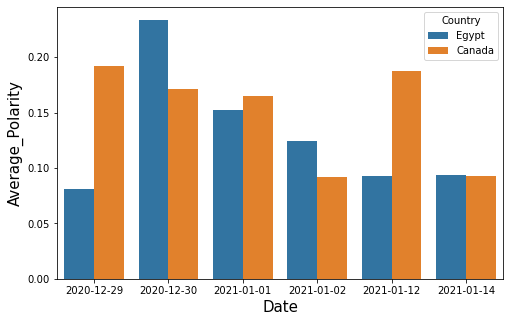

In [104]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Date", y="Average_Polarity", hue="Country", data=df_tweetsAverage)

From the above output, we can see that the happiness score of Egypt from the tweets is always higher than that of the happiness dataset, while the happiness score of Canada is always lower than that of the tweets. This could be due to the fact that the COVID-19 pandemic is currently affecting Canada very harshly (as of the date writing this report) with 7 to 8 thousand new cases daily, which is definitely affecting the general mood of the people. However, the Egyptians are not as affected with the pandemic, with much lower daily new cases. Moreover, in Egypt, which is an undeveloped country, the number of Twitter users is not very representative of the average population, due to the big population segment that is uneducated and living in rural areas with no direct access to internet. This could also be a reason as to why the Twitter text polarity is higher than that of the happiness score, as the happiness score takes into account all the population, instead of the small portion that uses Twitter (which tends to be richer people with generally lesser problems). There could also be other factors as to why the average tweet polarity is contradicting with the happiness scores from the happiness datasets in both countries, but these are our guesses and we cannot be certain.